# Application of Machine Learning Algorithms on Student Performance Analysis

# CHAPTER 1 INTRODUCTION

In [ ]:
#-----------------------------------------------------------------------
install.packages("dplyr")
install.packages("fGarch")
install.packages("forecast")
install.packages("tidyverse")
install.packages("stratification")
install.packages("fBasics")
install.packages("ISLR")
install.packages("splitstackshape")
install.packages("factoextra")
install.packages("sampling")
install.packages("Hmisc")
install.packages("caret")
install.packages("class")
install.packages("e1071")
install.packages("mltools")
install.packages("caTools")
install.packages("ggfortify")
install.packages("readxl")
install.packages("class")
install.packages("MASS")
install.packages("kknn")
install.packages("tree")
install.packages("randomForest")
install.packages("gbm")
install.packages("readxl")
install.packages("MASS")
install.packages("REdaS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘gss’, ‘stabledist’, ‘gbutils’, ‘Rdpack’, ‘fBasics’, ‘timeDate’, ‘timeSeries’, ‘fastICA’, ‘cvar’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/

In [ ]:
library(dplyr)
library(tidyverse)
library(tidyr)
library(tibble)
library(fGarch)
library(forecast)
library(stratification)
library(ISLR)
library(splitstackshape)
library(fBasics)
library(factoextra)
library(ggpubr)
library(Hmisc)
library(ggfortify)
library(ggplot2)
library(e1071)
library(class)
library(caret)
library(devtools)
library(mltools)
library(caTools)
require(data.table)
require(sampling)
library(readxl)
library(MASS)
library(kknn)
library(tree)
library(randomForest)
library(gbm)
library(REdaS)
library(ipred)
library(gridExtra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.1     ✔ readr     2.1.5
✔ ggplot2   4.0.0     ✔ stringr   1.6.0
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.2.0     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch' is attached.

If needed attach them yourself in your R script by e.g.,
        require("timeSeries")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.d

## Chapter 1.2 Data Preparation

### 1.2.1: Load and prepare datasets

In [ ]:
#Create a targeted csv.file
df1 = read.table("https://raw.githubusercontent.com/codekeng00/datasets/main/student-mat.csv",sep=";", header=T)
df2 = read.table("https://raw.githubusercontent.com/codekeng00/datasets/main/student-por.csv",sep=";", header=T)
df3 = merge(df1,df2,by=c("school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"))

In [ ]:
#check dimension
dim(df3)

[1] 382  53

In [ ]:
#View data frame


In [ ]:
#create student_id
student_id<-c(1:382)
df3<-data.frame(df3,student_id)
str(df3)

#sort the student_id to 1st column
df3 =df3[,c(54,1:53)]

'data.frame':	382 obs. of  54 variables:
 $ school      : chr  "GP" "GP" "GP" "GP" ...
 $ sex         : chr  "F" "F" "F" "F" ...
 $ age         : int  15 15 15 15 15 15 15 15 15 15 ...
 $ address     : chr  "R" "R" "R" "R" ...
 $ famsize     : chr  "GT3" "GT3" "GT3" "GT3" ...
 $ Pstatus     : chr  "T" "T" "T" "T" ...
 $ Medu        : int  1 1 2 2 3 3 3 2 3 3 ...
 $ Fedu        : int  1 1 2 4 3 4 4 2 1 3 ...
 $ Mjob        : chr  "at_home" "other" "at_home" "services" ...
 $ Fjob        : chr  "other" "other" "other" "health" ...
 $ reason      : chr  "home" "reputation" "reputation" "course" ...
 $ nursery     : chr  "yes" "no" "yes" "yes" ...
 $ internet    : chr  "yes" "yes" "no" "yes" ...
 $ guardian.x  : chr  "mother" "mother" "mother" "mother" ...
 $ traveltime.x: int  2 1 1 1 2 1 2 2 2 1 ...
 $ studytime.x : int  4 2 1 3 3 3 3 2 4 4 ...
 $ failures.x  : int  1 2 0 0 2 0 2 0 0 0 ...
 $ schoolsup.x : chr  "yes" "yes" "yes" "yes" ...
 $ famsup.x    : chr  "yes" "yes" "yes" "yes" ...

## 1.2.2: Cleaning datasets

In [ ]:
#Data cleansing
#1. Remove all duplicates and update the data frame
df1= distinct(df1)
df2= distinct(df2)
df3= distinct(df3)

## 1.2.3: Splitting training and testing data (numerical data)

In [ ]:
#2.Remove all missing numeric data type
#Cannot remove any missing characters, the R program will autofill the missing character
df1= na.omit(df1)
df2= na.omit(df2)
df3= na.omit(df3)

#2. Separate into training set and testing set to avoid overfitting
set.seed(123)
NewTrainingData= stratified(df3,c("G3.x","G3.y"),size=0.75)
NewTestingData=  anti_join(df3, NewTrainingData, by="student_id")

## 1.2.4: Splitting training and testing data (categorical data)

In [ ]:
#3. Verify the training set and testing set are valid by checking row number
nrow(NewTestingData)+ nrow(NewTrainingData)
nrow(df3)
#If both number same: indicate data set assigned properly.

[1] 382

[1] 382

# CHAPTER 2 UNSUPERVISED LEARNING

### 2.1 Basic Descriptive Analysis (Numeric)

### 2.1.2 Basic Descriptive Analysis on Numeric Data

#### 2.1.2.1 For Math

In [ ]:
##Basic Descriptive Stats for Analyzing Overall Performance
##For Math
basicStats(df1$G3,ci = 0.99)

,X..df1.G3
,<dbl>
nobs,395.000000
NAs,0.000000
Minimum,0.000000
Maximum,20.000000
1. Quartile,8.000000
3. Quartile,14.000000
Mean,10.415190
Median,11.000000
Sum,4114.000000


##### 2.1.2.1.1 Mean Test for Math

In [ ]:
#1. mean test
t.test(df1$G3)


	One Sample t-test

data:  df1$G3
t = 45.182, df = 394, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  9.961992 10.868388
sample estimates:
mean of x 
 10.41519 


##### 2.1.2.1.2 Skewness Test for Math

In [ ]:
#2. skewness test
s <- -0.727117
s.test <- s/sqrt(6/395)
pnorm(s.test)
pv1 <- 2*(1-pnorm(s.test))
pv1
s.test

[1] 1.821221e-09

[1] 2

[1] -5.899663

##### 2.1.2.1.3Kurtosis Test for Math

In [ ]:
#3. kurtosis test
k <- 0.366072
k.test <- k/sqrt(24/649)
pnorm(k.test)
pv2 <- 2*(1-pnorm(k.test))
pv2
k.test

[1] 0.971521

[1] 0.05695799

[1] 1.903633

##### 2.1.2.1.4 Normal Test (Jarque-Bera) for Math

In [ ]:
#4. normality test
normalTest(df1$G3, method="jb")


Title:
 Jarque-Bera Normality Test

Test Results:
  STATISTIC:
    X-squared: 37.4883
  P VALUE:
    Asymptotic p Value: 7.236e-09 


#### 2.1.2.2 For Portuguese

In [ ]:
##For Portuguese
basicStats(df2$G3,ci=0.99)

,X..df2.G3
,<dbl>
nobs,649.000000
NAs,0.000000
Minimum,0.000000
Maximum,19.000000
1. Quartile,10.000000
3. Quartile,14.000000
Mean,11.906009
Median,12.000000
Sum,7727.000000


##### 2.1.2.2.1 Mean Test for Portuguese

In [ ]:
#1. mean test
t.test(df2$G3)


	One Sample t-test

data:  df2$G3
t = 93.885, df = 648, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 11.65699 12.15503
sample estimates:
mean of x 
 11.90601 


##### 2.1.2.2.2 Skewness Test for Portuguese

In [ ]:
#2. skewness test
s <- -0.908694
s.test <- s/sqrt(6/649)
pnorm(s.test)
pv1 <- 2*(1-pnorm(s.test))
pv1
s.test

[1] 1.682719e-21

[1] 2

[1] -9.450709

##### 2.1.2.2.3 Kurtosis Test for Portuguese

In [ ]:
#3. kurtosis test
k <- 2.664626
k.test <- k/sqrt(24/649)
pnorm(k.test)
pv2 <- 2*(1-pnorm(k.test))
pv2
k.test

[1] 1

[1] 0

[1] 13.85648

##### 2.1.2.2.3 Normal Test (Jarque-Bera) for Portuguese

In [ ]:
#4. normality test
normalTest(df2$G3, method="jb")


Title:
 Jarque-Bera Normality Test

Test Results:
  STATISTIC:
    X-squared: 284.2619
  P VALUE:
    Asymptotic p Value: < 2.2e-16 


#### 2.1.2.3 Analysis of correlation between final grade for Math and Portuguese

In [ ]:
#analysis of correlation between final grade for Math and Portuguese
correlationTest(df3$G3.x,df3$G3.y)


Title:
 Pearson's Correlation Test

Test Results:
  PARAMETER:
    Degrees of Freedom: 380
  SAMPLE ESTIMATES:
    Correlation: 0.4803
  STATISTIC:
    t: 10.6761
  P VALUE:
    Alternative Two-Sided: < 2.2e-16 
    Alternative      Less: 1 
    Alternative   Greater: < 2.2e-16 
  CONFIDENCE INTERVAL:
    Two-Sided: 0.3993, 0.554
         Less: -1, 0.5427
      Greater: 0.4128, 1


##### 2.1.2.3.1 Scatterplots: analysis between final grades and 1st/2nd grade for Math

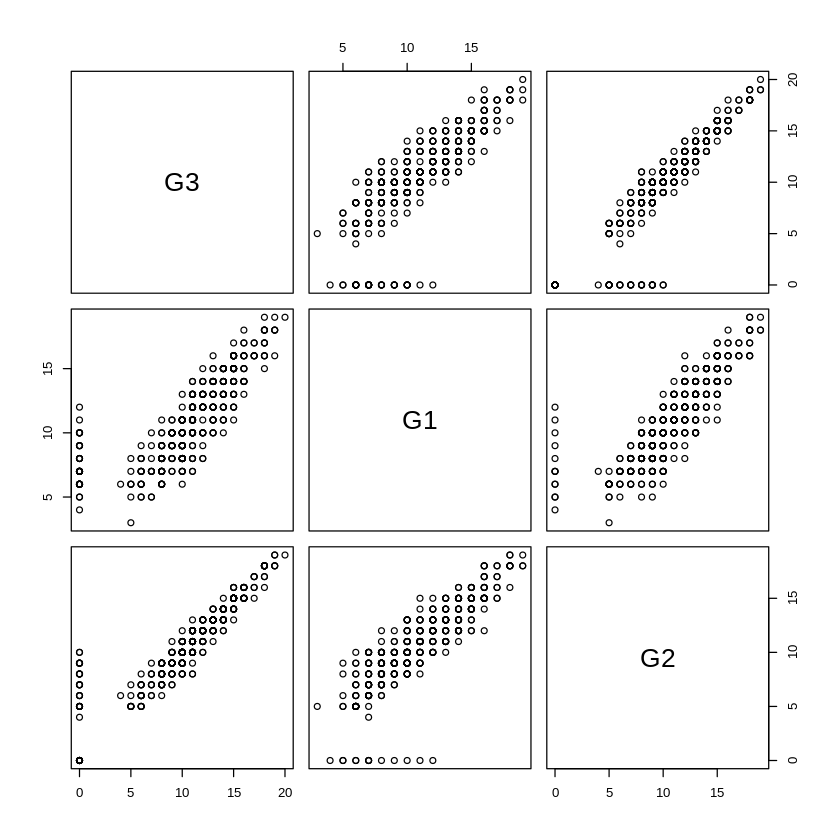

In [ ]:
attach(df1)
#scatterplots: analysis between final grades and 1st/2nd grade for Math
pairs(G3~G1+G2)
detach(df1)

##### 2.1.2.3.2 Scatterplots: analysis between final grades and 1st/2nd grade for Portuguese

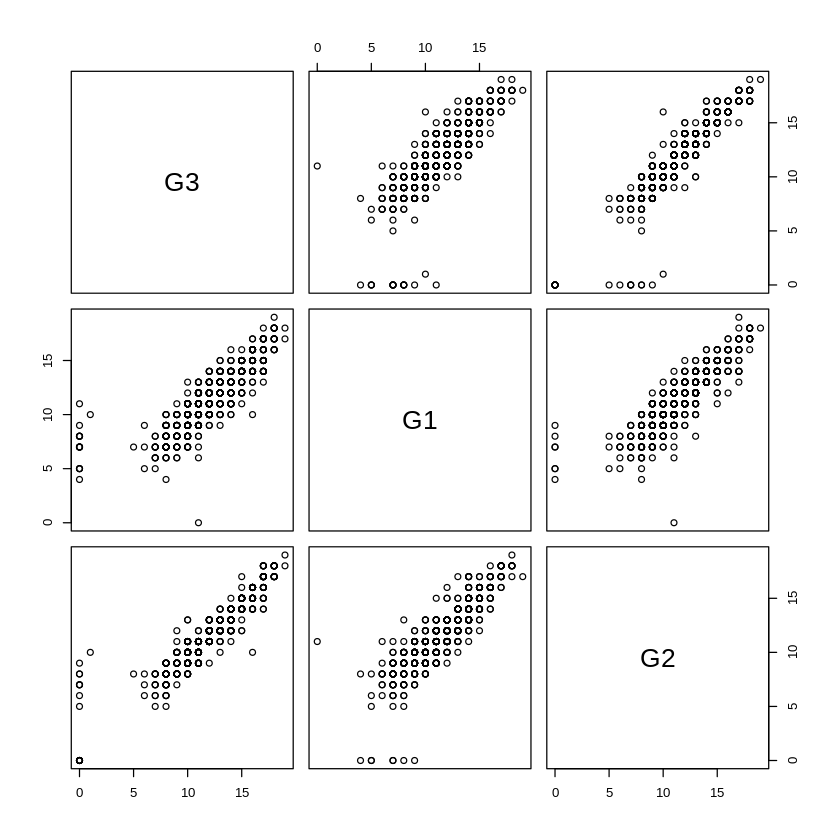

In [ ]:
attach(df2)
#scatterplots: analysis between final grades and 1st/2nd grade for Portuguese
pairs(G3~G1+G2)
detach(df2)

##### 2.1.2.3.3 Analysis of numeric social factor

traveltime,studytime,freetime,goout,DailyAlcohol,Math Final Grade
2,2,3,4,1,6
1,2,3,3,1,6
1,2,3,2,2,10
1,3,2,2,1,15
1,2,3,2,1,10


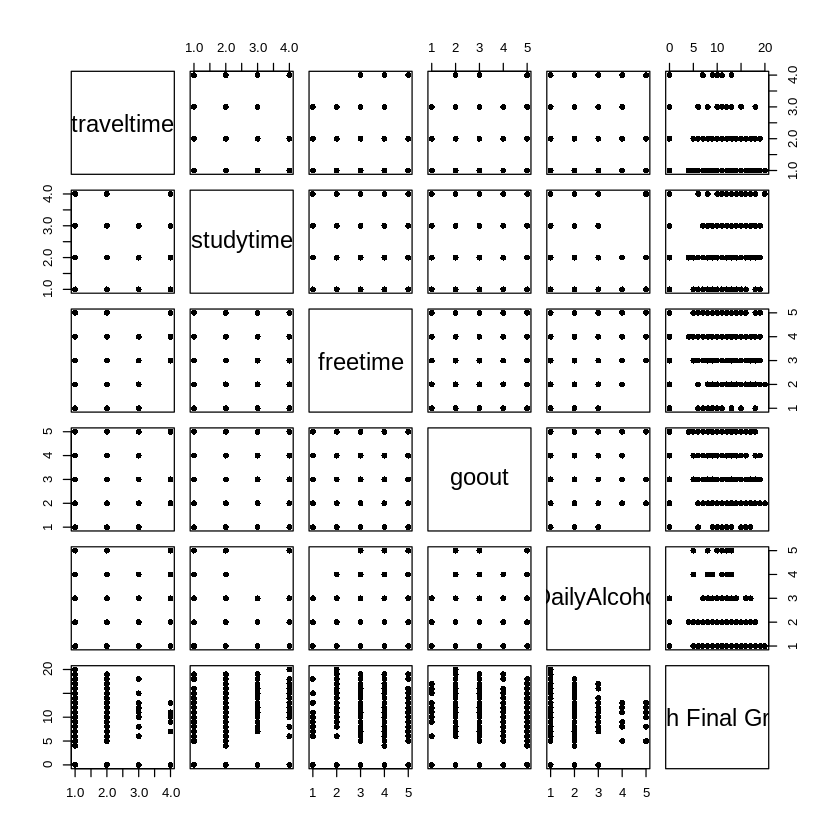

In [ ]:
#analysis of numeric social factor
socialfactor=cbind(df1$traveltime,df1$studytime,df1$freetime,df1$goout,df1$Dalc,df1$G3)
colnames(socialfactor)=c("traveltime","studytime","freetime","goout","DailyAlcohol","Math Final Grade")
head(socialfactor, n = 5)
pairs(socialfactor, pch=16,cex.labels = 1.8) #cex.labels = font size

##### 2.1.2.3.4 Analysis of other numeric factors

Mother Education,Father Education,Failures,Health,absences,family relationship,Portuguese Final Grade
4,4,0,3,4,4,11
1,1,0,3,2,5,11
1,1,0,3,6,4,12
4,2,0,5,0,3,14
3,3,0,5,0,4,13


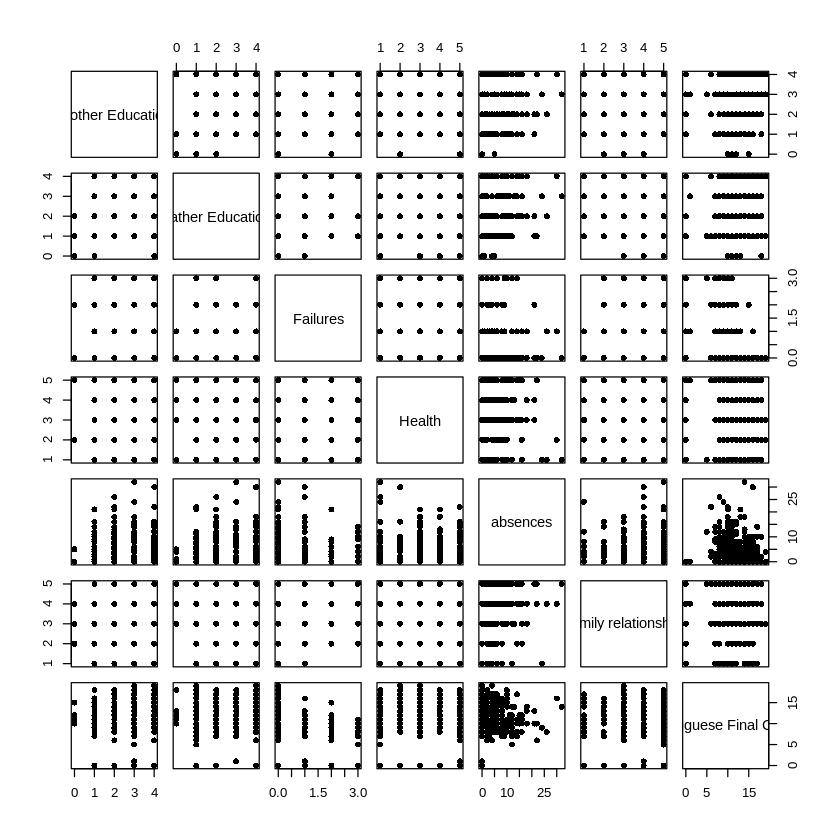

In [ ]:
#analysis of other numeric factors
otherfactor=cbind(df2$Medu,df2$Fedu,df2$failures,df2$health,df2$absences,df2$famrel,df2$G3)
colnames(otherfactor)=c("Mother Education","Father Education","Failures","Health","absences","family relationship","Portuguese Final Grade")
head(otherfactor, n = 5)
pairs(otherfactor, pch=16, cex.labels = 1.11) #cex.labels = font size


### 2.1.3 Basic Descriptive Analysis (Categorical)

#### 2.1.3.1 Distribution: Analysis by school

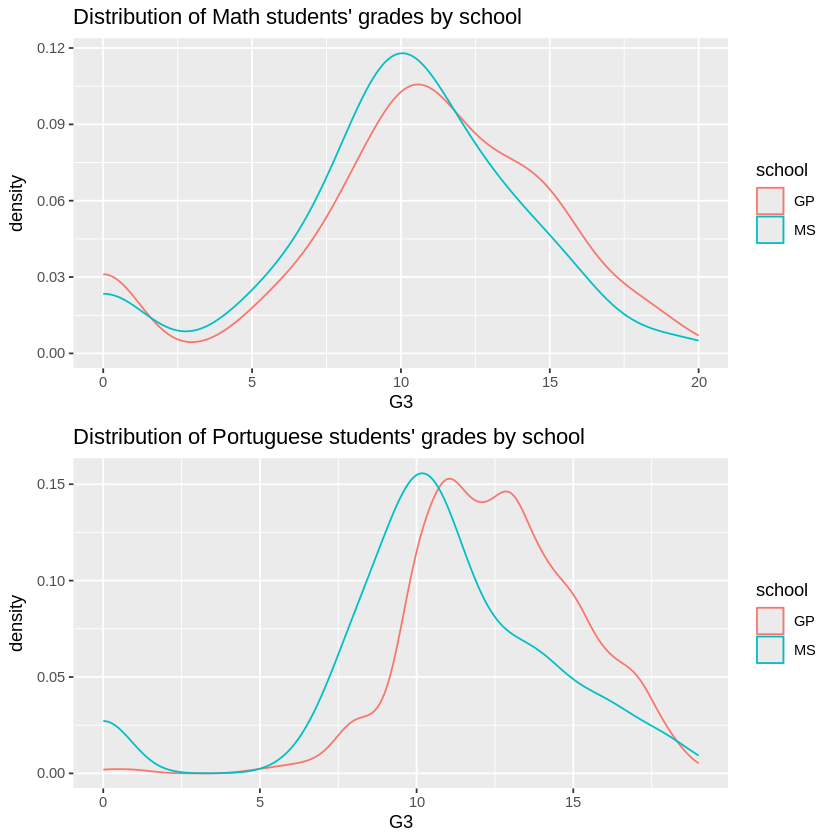

In [ ]:
#distribution: analysis by school
schoolMath <- ggplot(df1, aes(x=G3)) +
  geom_density(aes(color=school)) +
  ggtitle("Distribution of Math students' grades by school")

schoolPort <- ggplot(df2, aes(x=G3)) +
  geom_density(aes(color=school)) +
  ggtitle("Distribution of Portuguese students' grades by school")

grid.arrange(schoolMath, schoolPort)

#### 2.1.3.2 Distribution: Analysis by address

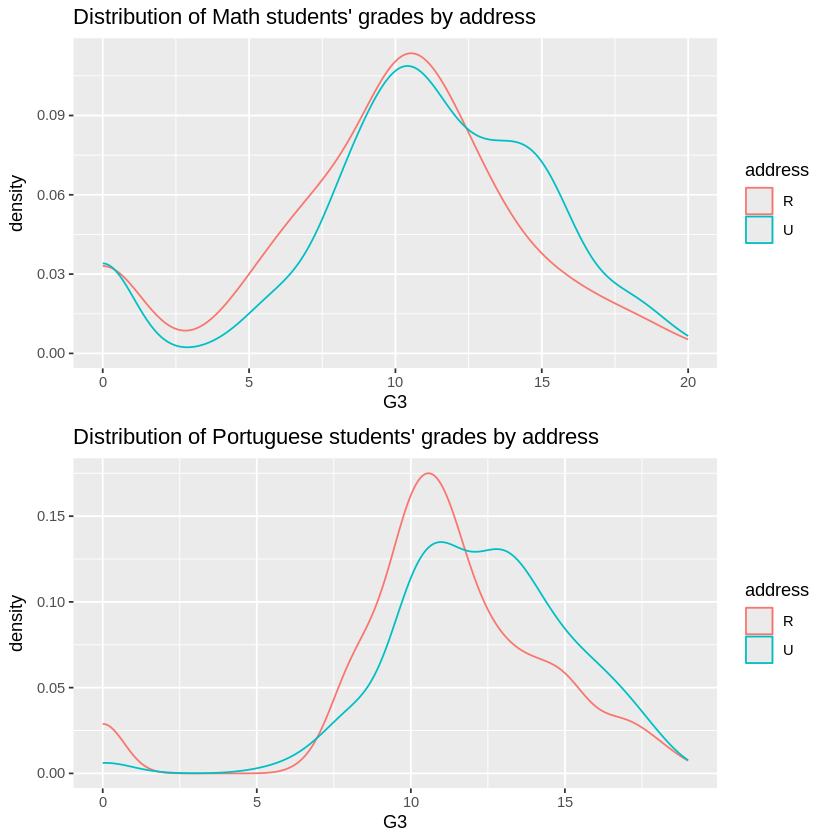

In [ ]:
#distribution: analysis by address
addressMath <- ggplot(df1, aes(x=G3)) +
  geom_density(aes(color=address)) +
  ggtitle("Distribution of Math students' grades by address")

addressPort <- ggplot(df2, aes(x=G3)) +
  geom_density(aes(color=address)) +
  ggtitle("Distribution of Portuguese students' grades by address")

grid.arrange(addressMath, addressPort)

### 2.1.4 Chi-squared test of association

Conversion of results to Pass/Fail

In [ ]:
###chi-squared test of association
##1. Conversion of results to Pass/Fail
mathresult= ifelse(df1$G3<10,"failed","passed")
View(mathresult)

portugueseresult= ifelse(df2$G3<10,"failed","passed")
View(portugueseresult)

[1] "failed" "failed" "passed" "passed" "passed" "passed" "passed" "failed"
  [9] "passed" "passed" "failed" "passed" "passed" "passed" "passed" "passed"
 [17] "passed" "passed" "failed" "passed" "passed" "passed" "passed" "passed"
 [25] "failed" "failed" "passed" "passed" "passed" "passed" "passed" "passed"
 [33] "passed" "passed" "passed" "failed" "passed" "passed" "passed" "passed"
 [41] "passed" "passed" "passed" "passed" "failed" "failed" "passed" "passed"
 [49] "passed" "failed" "passed" "passed" "passed" "passed" "passed" "passed"
 [57] "passed" "passed" "failed" "passed" "passed" "passed" "failed" "failed"
 [65] "passed" "passed" "passed" "failed" "failed" "passed" "passed" "passed"
 [73] "failed" "passed" "passed" "passed" "passed" "passed" "passed" "failed"
 [81] "passed" "passed" "failed" "passed" "passed" "failed" "failed" "passed"
 [89] "passed" "failed" "failed" "passed" "failed" "passed" "passed" "passed"
 [97] "passed" "passed" "passed" "failed" "failed" "passed" "passed" "failed"
[105] "passed" "passed" "failed" "passed" "passed" "passed" "passed" "passed"
[113] "passed" "passed" "failed" "passed" "passed" "passed" "failed" "passed"
[121] "passed" "passed" "passed" "passed" "failed" "passed" "passed" "failed"
[129] "failed" "passed" "failed" "failed" "passed" "passed" "failed" "failed"
[137] "failed" "failed" "passed" "passed" "failed" "failed" "passed" "passed"
[145] "failed" "passed" "failed" "passed" "failed" "passed" "failed" "passed"
[153] "passed" "failed" "passed" "failed" "passed" "passed" "passed" "passed"
[161] "failed" "failed" "failed" "passed" "failed" "passed" "passed" "passed"
[169] "failed" "passed" "failed" "passed" "passed" "failed" "failed" "failed"
[177] "passed" "failed" "failed" "passed" "failed" "passed" "passed" "failed"
[185] "passed" "passed" "passed" "passed" "failed" "passed" "passed" "failed"
[193] "failed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[201] "passed" "passed" "passed" "failed" "passed" "failed" "failed" "passed"
[209] "passed" "failed" "failed" "passed" "passed" "failed" "passed" "passed"
[217] "failed" "failed" "failed" "passed" "failed" "failed" "passed" "passed"
[225] "passed" "failed" "passed" "passed" "failed" "passed" "passed" "passed"
[233] "failed" "passed" "failed" "passed" "passed" "passed" "passed" "failed"
[241] "passed" "passed" "failed" "passed" "failed" "passed" "passed" "failed"
[249] "failed" "passed" "failed" "passed" "failed" "failed" "passed" "failed"
[257] "passed" "passed" "passed" "failed" "passed" "failed" "passed" "failed"
[265] "failed" "passed" "passed" "passed" "passed" "failed" "failed" "passed"
[273] "passed" "passed" "passed" "passed" "failed" "failed" "failed" "passed"
[281] "failed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[289] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[297] "failed" "failed" "passed" "passed" "passed" "passed" "passed" "passed"
[305] "passed" "passed" "passed" "failed" "passed" "passed" "failed" "passed"
[313] "passed" "passed" "passed" "passed" "failed" "failed" "passed" "passed"
[321] "passed" "failed" "passed" "passed" "passed" "passed" "passed" "passed"
[329] "failed" "passed" "failed" "passed" "failed" "failed" "failed" "passed"
[337] "passed" "failed" "passed" "passed" "passed" "failed" "passed" "failed"
[345] "passed" "passed" "passed" "failed" "passed" "passed" "failed" "passed"
[353] "failed" "failed" "passed" "failed" "passed" "passed" "passed" "passed"
[361] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "failed"
[369] "passed" "passed" "failed" "passed" "passed" "failed" "passed" "passed"
[377] "passed" "passed" "passed" "passed" "passed" "failed" "passed" "failed"
[385] "failed" "passed" "failed" "failed" "failed" "failed" "failed" "passed"
[393] "failed" "passed" "failed"

[1] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
  [9] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
 [17] "passed" "passed" "failed" "passed" "passed" "passed" "passed" "passed"
 [25] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
 [33] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
 [41] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
 [49] "passed" "passed" "passed" "passed" "failed" "passed" "passed" "passed"
 [57] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
 [65] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
 [73] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
 [81] "passed" "failed" "passed" "passed" "passed" "passed" "passed" "passed"
 [89] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
 [97] "passed" "passed" "passed" "passed" "failed" "passed" "passed" "passed"
[105] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[113] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[121] "passed" "passed" "passed" "passed" "passed" "failed" "passed" "passed"
[129] "passed" "passed" "passed" "failed" "passed" "passed" "passed" "passed"
[137] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[145] "passed" "passed" "passed" "passed" "failed" "passed" "failed" "passed"
[153] "passed" "passed" "passed" "failed" "passed" "passed" "passed" "passed"
[161] "passed" "failed" "passed" "failed" "passed" "passed" "passed" "passed"
[169] "failed" "passed" "passed" "passed" "failed" "passed" "failed" "failed"
[177] "passed" "failed" "failed" "failed" "passed" "passed" "passed" "passed"
[185] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[193] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[201] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[209] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[217] "passed" "passed" "passed" "failed" "passed" "passed" "passed" "passed"
[225] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[233] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "failed"
[241] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[249] "failed" "passed" "passed" "passed" "passed" "passed" "passed" "failed"
[257] "failed" "failed" "passed" "passed" "passed" "passed" "failed" "failed"
[265] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[273] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "failed"
[281] "passed" "passed" "failed" "passed" "failed" "passed" "passed" "passed"
[289] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[297] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[305] "passed" "failed" "passed" "passed" "passed" "passed" "passed" "passed"
[313] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[321] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[329] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[337] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[345] "passed" "passed" "passed" "failed" "passed" "passed" "passed" "passed"
[353] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[361] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[369] "passed" "passed" "failed" "passed" "passed" "passed" "passed" "passed"
[377] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[385] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[393] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[401] "passed" "passed" "passed" "passed" "passed" "passed" "passed" "passed"
[409] "passed" "passed" 

In [ ]:
##2. Chi-squared test, for unsupervised learning demonstration purposes
chisq.test(df1$activities,mathresult)
chisq.test(df1$romantic, mathresult)
chisq.test(df2$internet, portugueseresult)
chisq.test(df2$reason, portugueseresult)


	Pearson's Chi-squared test with Yates' continuity correction

data:  df1$activities and mathresult
X-squared = 0.019497, df = 1, p-value = 0.889



	Pearson's Chi-squared test with Yates' continuity correction

data:  df1$romantic and mathresult
X-squared = 3.3451, df = 1, p-value = 0.0674



	Pearson's Chi-squared test with Yates' continuity correction

data:  df2$internet and portugueseresult
X-squared = 4.4887, df = 1, p-value = 0.03412



	Pearson's Chi-squared test

data:  df2$reason and portugueseresult
X-squared = 17.988, df = 3, p-value = 0.0004423


## 2.2 Correlation Analysis

### 2.2.2 Bartlett's Test of Sphericity

In [ ]:
###For Math & Portuguese
#convert all qualitative data into quantitative data
numericTrainingData <- data.frame(model.matrix( ~ .- 1, data=NewTrainingData))

#remove student_id from training data, useless in Correlation and PCA Analysis
numericTrainingData=numericTrainingData[,-1]

#run correlation matrix to analysis all strongly correlated variables
corMat=cor(numericTrainingData)

#Perform Bartlett's Test Of Sphericity,
bart_spher(corMat, use = "everything")

	Bartlett's Test of Sphericity

Call: bart_spher(x = corMat, use = "everything")

     X2 = 17262.53
     df = 2016
p-value < 2.22e-16

### 2.2.3 Correlation Analysis- Fact Checking

In [ ]:
#generate p-value for each x_ij in correlation matrix
rcorr(corMat)
View(rcorr(corMat))
p.value= rcorr(corMat)[["P"]] #["P"] means pick p-value, ["r"] means pick Pearson Coeffiecient

#use symbol to replace significant codes to ease analysis
p.value_matrix = symnum(p.value, corr = FALSE, na = FALSE,
                        cutpoints = c(0, 0.001, 0.01, 0.05, 0.1, 1),
                        symbols = c("***", "**", "*", ".", " "),abbr.colnames = FALSE)

                 schoolGP schoolMS  sexM   age addressU famsizeLE3 PstatusT
schoolGP             1.00    -1.00 -0.04 -0.66     0.61       0.03    -0.28
schoolMS            -1.00     1.00  0.04  0.66    -0.61      -0.03     0.28
sexM                -0.04     0.04  1.00  0.06    -0.02       0.13     0.09
age                 -0.66     0.66  0.06  1.00    -0.47      -0.02     0.16
addressU             0.61    -0.61 -0.02 -0.47     1.00       0.04    -0.21
famsizeLE3           0.03    -0.03  0.13 -0.02     0.04       1.00    -0.27
PstatusT            -0.28     0.28  0.09  0.16    -0.21      -0.27     1.00
Medu                 0.41    -0.41  0.10 -0.49     0.39       0.04    -0.34
Fedu                 0.29    -0.29  0.07 -0.48     0.32      -0.03    -0.27
Mjobhealth           0.25    -0.25 -0.10 -0.36     0.29      -0.02    -0.10
Mjobother           -0.23     0.23 -0.10  0.34    -0.21      -0.07     0.05
Mjobservices         0.17    -0.17  0.08 -0.15     0.17       0.02    -0.07
Mjobteacher 

                 schoolGP schoolMS  sexM   age addressU famsizeLE3 PstatusT
schoolGP             1.00    -1.00 -0.04 -0.66     0.61       0.03    -0.28
schoolMS            -1.00     1.00  0.04  0.66    -0.61      -0.03     0.28
sexM                -0.04     0.04  1.00  0.06    -0.02       0.13     0.09
age                 -0.66     0.66  0.06  1.00    -0.47      -0.02     0.16
addressU             0.61    -0.61 -0.02 -0.47     1.00       0.04    -0.21
famsizeLE3           0.03    -0.03  0.13 -0.02     0.04       1.00    -0.27
PstatusT            -0.28     0.28  0.09  0.16    -0.21      -0.27     1.00
Medu                 0.41    -0.41  0.10 -0.49     0.39       0.04    -0.34
Fedu                 0.29    -0.29  0.07 -0.48     0.32      -0.03    -0.27
Mjobhealth           0.25    -0.25 -0.10 -0.36     0.29      -0.02    -0.10
Mjobother           -0.23     0.23 -0.10  0.34    -0.21      -0.07     0.05
Mjobservices         0.17    -0.17  0.08 -0.15     0.17       0.02    -0.07
Mjobteacher 

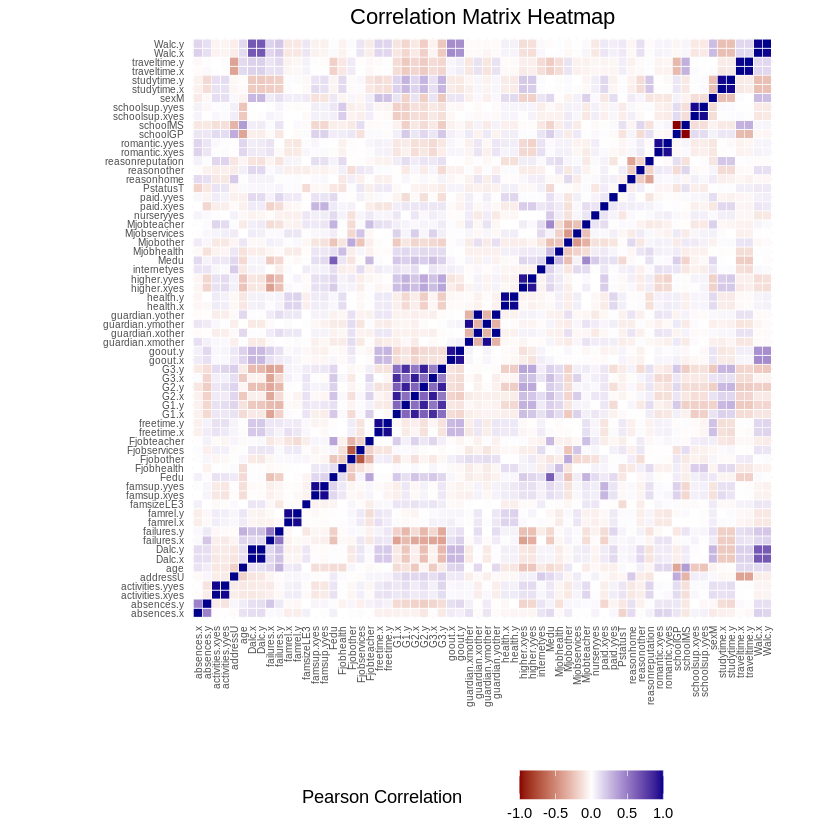

In [ ]:
# Re-perform rcorr on the original numeric data to get the correlation matrix (r values)
cor_results <- rcorr(as.matrix(numericTrainingData), type = "pearson")
cor_matrix <- cor_results$r

# Convert correlation matrix to a data frame for plotting
cor_matrix_df <- as.data.frame(cor_matrix) %>%
  tibble::rownames_to_column(var = "Var1")

# Get column names to pivot (all except 'Var1')
cols_to_pivot_cor <- setdiff(colnames(cor_matrix_df), "Var1")

# Melt (pivot_longer) the data frame to long format
cor_melted <- cor_matrix_df %>%
  pivot_longer(cols = all_of(cols_to_pivot_cor), names_to = "Var2", values_to = "Correlation")

# Create the heatmap for correlation matrix
ggplot(cor_melted, aes(x = Var1, y = Var2, fill = Correlation)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "darkred", mid = "white", high = "darkblue",
                       midpoint = 0, limit = c(-1,1),
                       name = "Pearson Correlation") +
  theme_minimal() +
  labs(title = "Correlation Matrix Heatmap",
       x = "",
       y = "") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 6),
        axis.text.y = element_text(size = 6),
        legend.position = "bottom",
        plot.title = element_text(hjust = 0.5)) +
  coord_fixed()

## 2.3 Principal Component Analysis

### 2.3.1: Analysis of Biplot – Determining factors affecting result for Math

In [ ]:
mathStudents <- df1
portStudents <- df2

# Convert character/factor columns in df1 and df2 into dummy variables.
# The previous `as.numeric()` coercion introduced NAs because character strings cannot be converted to numbers,
# which `prcomp` cannot handle by default.
# `model.matrix` is used to correctly transform categorical variables into a numerical format suitable for PCA.
mathStudents_processed <- data.frame(model.matrix(~ . - 1, data = mathStudents))
portStudents_processed <- data.frame(model.matrix(~ . - 1, data = portStudents))

# Scale the processed data
df1_pca <- data.frame(scale(mathStudents_processed))
df2_pca <- data.frame(scale(portStudents_processed))

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”


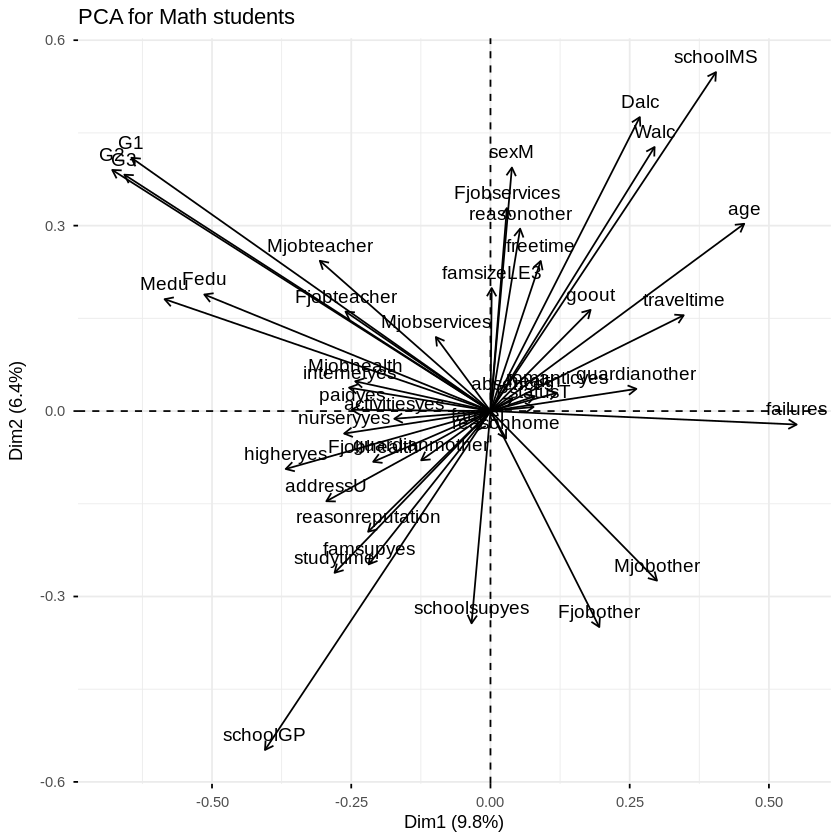

In [ ]:
# compute the principal components for Math
mathMod.pc <- prcomp(df1_pca)
fviz_pca_var(mathMod.pc) +
  ggtitle("PCA for Math students")

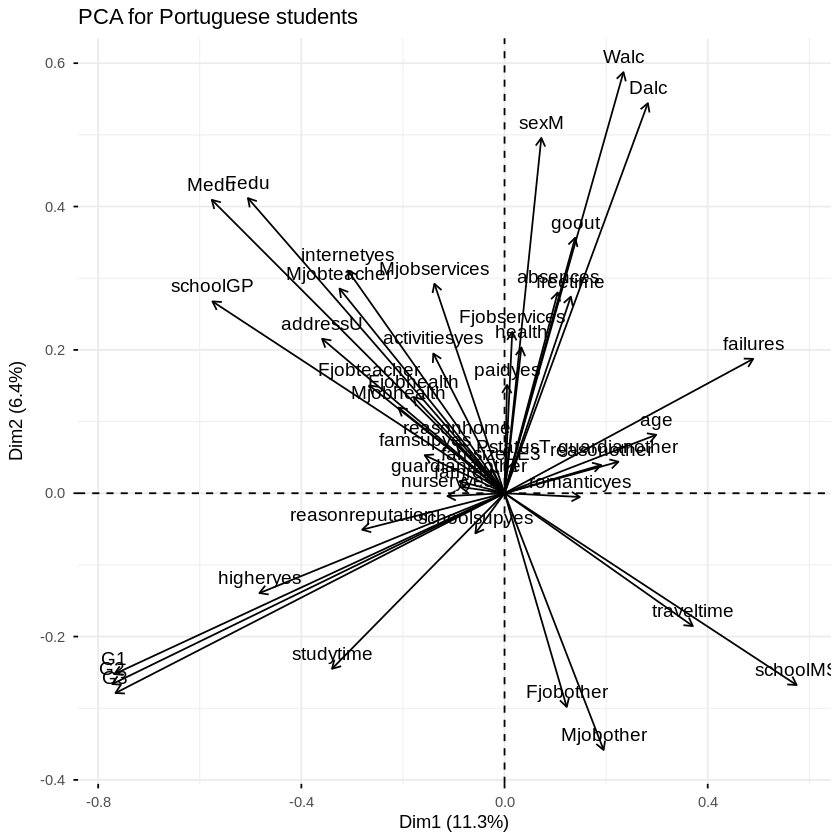

In [ ]:
# compute the principal components for Portuguese
portMod.pc <- prcomp(df2_pca)
fviz_pca_var(portMod.pc) +
  ggtitle("PCA for Portuguese students")

In [ ]:
#Generate summary of PCA analysis
summary(mathMod.pc)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.05353 1.66529 1.58561 1.47324 1.39795 1.33634 1.27203
Proportion of Variance 0.09807 0.06449 0.05847 0.05048 0.04545 0.04153 0.03763
Cumulative Proportion  0.09807 0.16256 0.22103 0.27151 0.31695 0.35848 0.39611
                          PC8     PC9    PC10    PC11   PC12    PC13    PC14
Standard deviation     1.2233 1.21338 1.18504 1.15365 1.1339 1.09670 1.07725
Proportion of Variance 0.0348 0.03424 0.03266 0.03095 0.0299 0.02797 0.02699
Cumulative Proportion  0.4309 0.46515 0.49781 0.52876 0.5587 0.58664 0.61362
                          PC15    PC16    PC17    PC18   PC19    PC20   PC21
Standard deviation     1.04232 1.01669 1.00914 0.97879 0.9748 0.95177 0.9366
Proportion of Variance 0.02527 0.02404 0.02368 0.02228 0.0221 0.02107 0.0204
Cumulative Proportion  0.63889 0.66293 0.68661 0.70889 0.7310 0.75205 0.7725
                         PC22    PC23    P

In [ ]:
summary(portMod.pc)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2014 1.66458 1.53429 1.35712 1.32114 1.28596 1.25061
Proportion of Variance 0.1127 0.06444 0.05475 0.04283 0.04059 0.03846 0.03637
Cumulative Proportion  0.1127 0.17713 0.23188 0.27471 0.31530 0.35376 0.39013
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.20341 1.18485 1.13216 1.12784 1.10729 1.08643 1.06293
Proportion of Variance 0.03368 0.03265 0.02981 0.02958 0.02851 0.02745 0.02627
Cumulative Proportion  0.42381 0.45646 0.48627 0.51585 0.54436 0.57181 0.59809
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.02352 1.01045 0.99282 0.97464 0.96487 0.96032 0.93322
Proportion of Variance 0.02436 0.02374 0.02292 0.02209 0.02165 0.02145 0.02025
Cumulative Proportion  0.62245 0.64620 0.66912 0.69121 0.71286 0.73431 0.75456
                          PC22

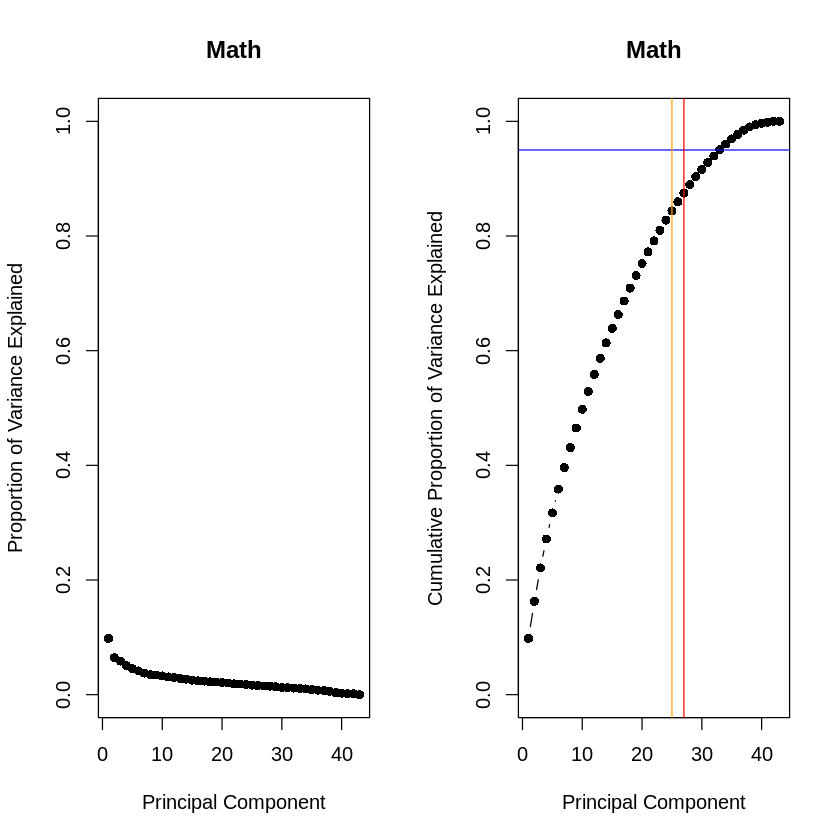

In [ ]:
#Calculate y-axis: Porportion of Variance Explained according to 2 formulae below
pr.var_x=mathMod.pc$sdev^2
pve_x=pr.var_x/sum(pr.var_x)

#Generate scree plot for determine best no.of PC for total variation explained
par(mfrow=c(1,2))
#1. PVE
plot(pve_x, ylim=c(0,1), type='b', xlab="Principal Component",
     ylab="Proportion of Variance Explained",main="Math", pch=16)

#2. CPVE & Analysis
#############
plot(cumsum(pve_x), ylim=c(0,1), type='b', xlab="Principal Component",
     ylab="Cumulative Proportion of Variance Explained",main="Math",pch=16)

abline(h=0.95,col="blue") #h= horizontal, v=vertical
abline(v=27,col="red") #27th PC
abline(v=25, col="orange") #25th PC
#############

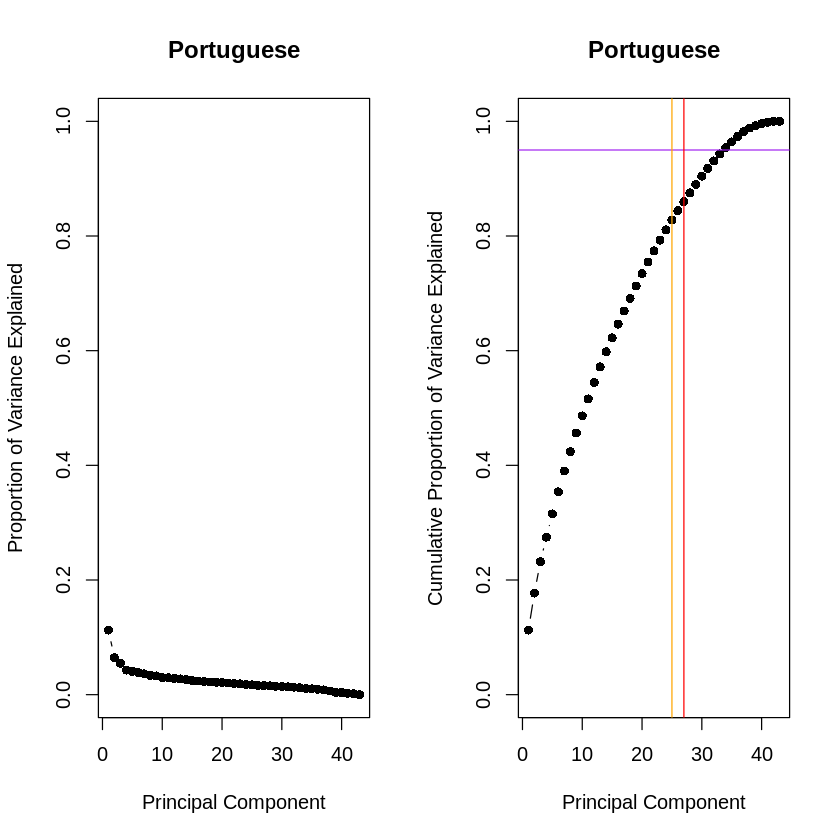

In [ ]:
#Calculate y-axis: Porportion of Variance Explained according to 2 formulae below
pr.var_y=portMod.pc$sdev^2
pve_y=pr.var_y/sum(pr.var_y)

#Generate scree plot for determine best no.of PC for total variation explained
par(mfrow=c(1,2))

#1. PVE
plot(pve_y, ylim=c(0,1), type='b', xlab="Principal Component",
     ylab="Proportion of Variance Explained", main="Portuguese",pch=16)

#2. CPVE
############
plot(cumsum(pve_y), ylim=c(0,1), type='b', xlab="Principal Component",
     ylab="Cumulative Proportion of Variance Explained", main="Portuguese",pch=16)

abline(h=0.95,col="purple") #h= horizontal, v=vertical
abline(v=27,col="red") #27th PC
abline(v=25, col="orange") #25th PC
#############

In [ ]:
###reset plot###
par(mfrow=c(1,1))

# Chapter 3 Supervised Learning

## 3.1 Linear Regression Model

In [ ]:
#---------------------------------Section 5--------------------------------
#Data Preparation, Reshuffle
set.seed(123)
train.mat = stratified(df1,c("G3"),size=0.75)
train.mat = train.mat[,-c(31,32)] #remove G1 and G2

set.seed(123)
train.por = stratified(df2,c("G3"),size=0.75)
train.por = train.por[,-c(31,32)] #remove G1 and G2

#Build testing set
test.mat = anti_join(df1, train.mat, by = NULL)
test.por = anti_join(df2, train.por, by = NULL)

#create actual models
mod_math <- lm(scale(G3) ~ . , data=train.mat)
mod_por <- lm(scale(G3) ~ . , data=train.por)


#predict test.mat by themself, same goes to test.por
test.mat.preds <- predict(mod_math, data=test.mat)
test.por.preds <- predict(mod_por, data=test.por)

test.mat.porpreds <- predict(mod_math, data=test.por)
test.por.matpreds <- predict(mod_por, data=test.mat)

Joining with `by = join_by(school, sex, age, address, famsize, Pstatus, Medu,
Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup,
famsup, paid, activities, nursery, higher, internet, romantic, famrel,
freetime, goout, Dalc, Walc, health, absences, G3)`
Joining with `by = join_by(school, sex, age, address, famsize, Pstatus, Medu,
Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup,
famsup, paid, activities, nursery, higher, internet, romantic, famrel,
freetime, goout, Dalc, Walc, health, absences, G3)`


### 3.1.1 Math students


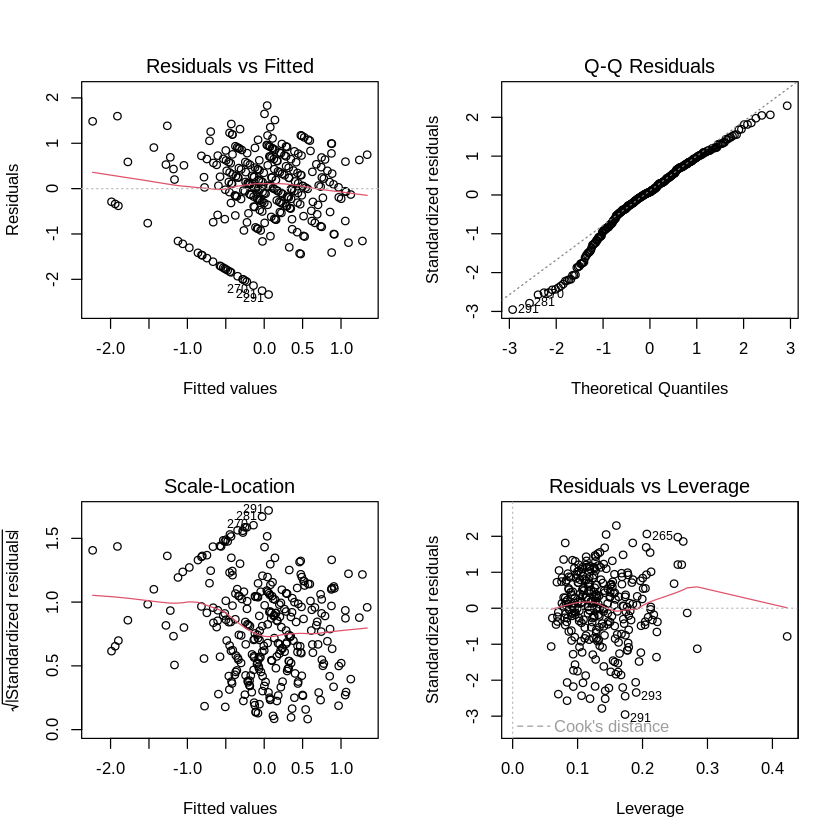

In [ ]:
#check condition: mainly linearity, then normality and outliers
####For Math
par(mfrow=c(2,2))
plot(mod_math)

### 3.1.2 Portuguese students

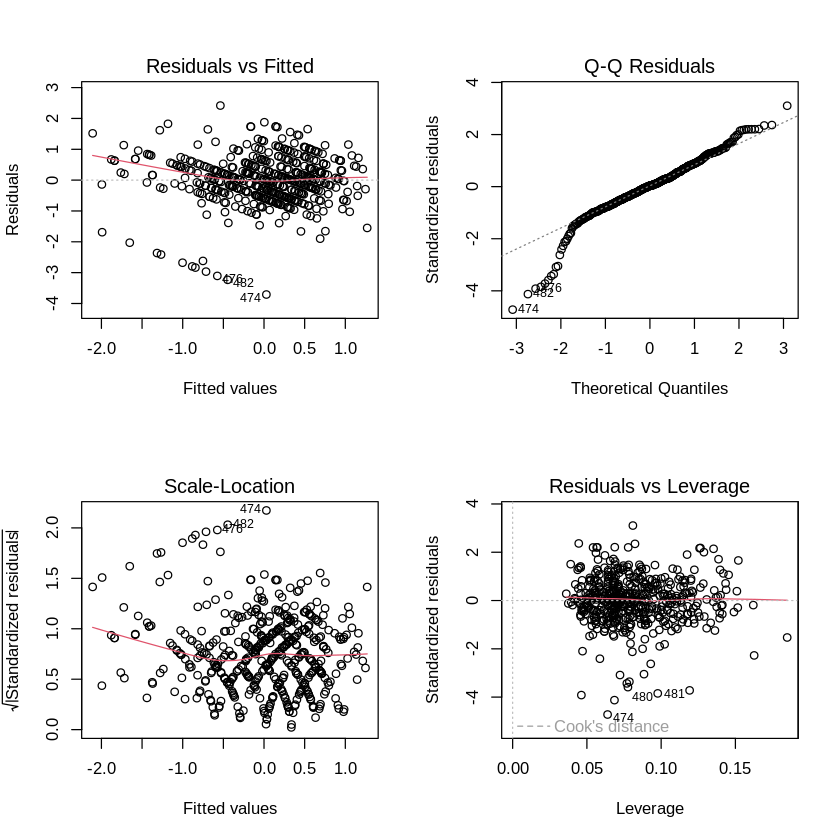

In [ ]:
###For Portuguese
par(mfrow=c(2,2))
plot(mod_por)

In [ ]:
#double check: normality of target output
shapiro.test(train.mat$G3)


	Shapiro-Wilk normality test

data:  train.mat$G3
W = 0.93018, p-value = 1.518e-10


In [ ]:
shapiro.test(train.por$G3)


	Shapiro-Wilk normality test

data:  train.por$G3
W = 0.92742, p-value = 1.27e-14


In [ ]:
#Condition checked: All assumptions have not been fulfilled
#Linear regression approaches cannot be used in these 2 data sets

#reset plot viewing to default
par(mfrow=c(1,1))

## 3.2 K-Nearest Neighbors

### 3.2.1 Math students

In [ ]:
# @title
'''
#---------------------------------Section 6--------------------------------

###Math Students

##Data Preparation
#1. read file= math student
file=read.table("student-mat.csv",sep=";",header=TRUE)

#2. add student id and group column
data=data.frame(studentID=1:nrow(file),file,group=c(0))
data$group[data$G3<10]<-0
data$group[data$G3>=10]<-1
str(data)

#3. converts categorical column into multiple binarized vectors
d3 <- one_hot(as.data.table(data))
d3

#4. normalize data using min-max approaches
normalize <-function(x){
  return((x-min(x))/(max(x)-min(x)))
}
d3 <- as.data.frame(lapply(d3,normalize))
View(d3)


#5. separate into training data and test data and data reshuffle
set.seed(300)
sample=sample.split(d3$group, SplitRatio= .75)
train_data=subset(d3, sample==TRUE)[,-1]
test_data=subset(d3, sample==FALSE)[,-1]

#6. Verify data set is split into training and testing set properly (check no.of rows)
NROW(test_data)
NROW(train_data)
###
'''

In [ ]:
#---------------------------------Section 6--------------------------------
###Math Students
##Data Preparation
#1. read file= math student
file = df1

#2. add student id and group column
data=data.frame(studentID=1:nrow(file),file,group=c(0))
data$group[data$G3<10]<-0
data$group[data$G3>=10]<-1
# str(data) # Removed to avoid clutter, can be uncommented for debugging

# 3. Convert character columns to factors before one_hot encoding.
#    The 'mltools::one_hot' function processes factor columns.
#    Explicitly converting character columns to factors ensures they are correctly processed.
char_cols <- sapply(data, is.character)
data[char_cols] <- lapply(data[char_cols], as.factor)

#    Then converts categorical column into multiple binarized vectors
d3 <- one_hot(as.data.table(data))
# d3 # Removed to avoid clutter, can be uncommented for debugging

#4. normalize data using min-max approaches
normalize <-function(x){
  # Ensure the column is numeric and handle cases where max == min (constant column)
  if (is.numeric(x)) {
    if (max(x, na.rm = TRUE) == min(x, na.rm = TRUE)) {
      return(0) # Return 0 for constant columns after normalization
    } else {
      return((x-min(x, na.rm = TRUE))/(max(x, na.rm = TRUE)-min(x, na.rm = TRUE)))
    }
  } else {
    # This block should ideally not be reached after proper one_hot encoding and factor conversion
    # If it is, it indicates a deeper issue or a column not intended for numeric normalization
    warning(paste("Non-numeric column encountered during normalization, returning as is:", class(x)))
    return(x) # Return non-numeric columns as is
  }
}
d3 <- as.data.frame(lapply(d3,normalize))

#5. separate into training data and test data and data reshuffle
set.seed(300)
sample=sample.split(d3$group, SplitRatio= .75)
train_data=subset(d3, sample==TRUE)[,-1] # Remove studentID column for training
test_data=subset(d3, sample==FALSE)[,-1]  # Remove studentID column for testing

#6. Verify data set is split into training and testing set properly (check no.of rows)
NROW(test_data)
NROW(train_data)

[1] 98

[1] 297

In [ ]:
#Build kNN model with k=7
train_data_group <- train_data$group
knn_model <- knn(train=train_data, test=test_data, cl=train_data_group, k=7)
knn_model

[1] 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
[39] 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
[77] 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0
Levels: 0 1

In [ ]:
#Generate Confusion Matrix (cm)
cm <-table(knn_model, test_data$group)
confusionMatrix(cm)

Confusion Matrix and Statistics

         
knn_model  0  1
        0 16  3
        1 16 63
                                         
               Accuracy : 0.8061         
                 95% CI : (0.7139, 0.879)
    No Information Rate : 0.6735         
    P-Value [Acc > NIR] : 0.002576       
                                         
                  Kappa : 0.5077         
                                         
 Mcnemar's Test P-Value : 0.005905       
                                         
            Sensitivity : 0.5000         
            Specificity : 0.9545         
         Pos Pred Value : 0.8421         
         Neg Pred Value : 0.7975         
             Prevalence : 0.3265         
         Detection Rate : 0.1633         
   Detection Prevalence : 0.1939         
      Balanced Accuracy : 0.7273         
                                         
       'Positive' Class : 0              
                                         

[1] 90.12346

[1] 5

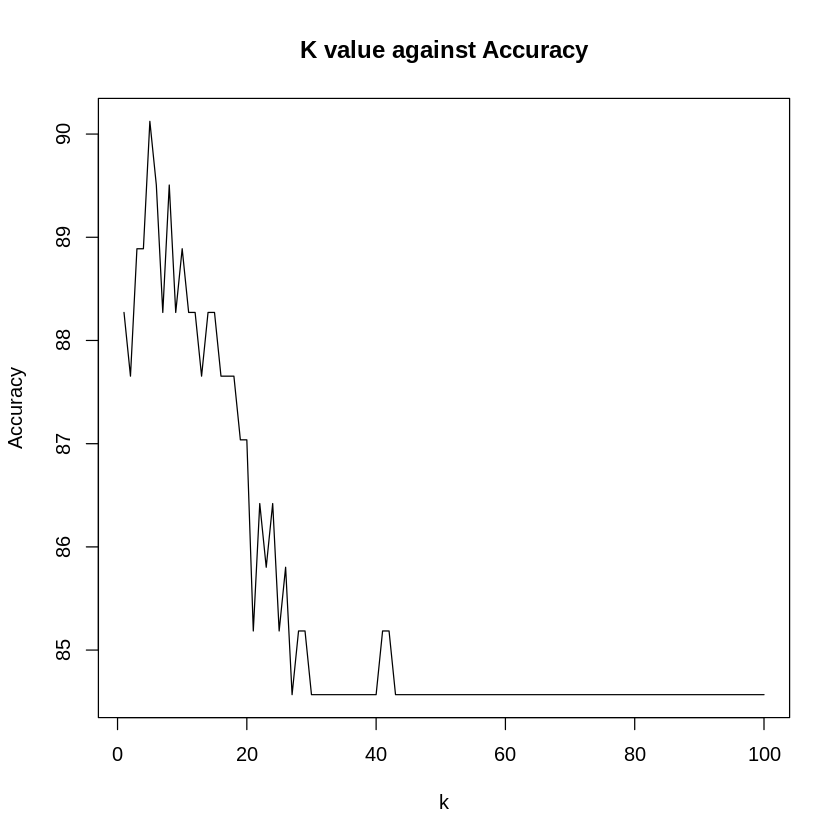

In [ ]:
#Find k such that accuracy of confusion matrix is the highest
i=1
k_accuracy=array(1:100)
k=array(1:100)
for (i in 1:100){
  set.seed(300) # Add set.seed() here for reproducibility
  knn_model <- knn(train=train_data, test=test_data, cl=train_data_group, k=i)
  k_accuracy[i] <- 100 * sum(test_data$group == knn_model)/NROW(test_data$group)
  k[i]=i
}
plot(k,k_accuracy,type="l",xlab="k",ylab="Accuracy",main="K value against Accuracy")

max(k_accuracy)
which.max(k_accuracy)

In [ ]:
set.seed(300)
#update the kNN model using best k value
knn_model <- knn(train=train_data, test=test_data, cl=train_data_group, k=13)

#Generate new Confusion Matrix (cm)
cm <-table(knn_model, test_data$group)
confusionMatrix(cm)

Confusion Matrix and Statistics

         
knn_model  0  1
        0 21  0
        1 11 66
                                         
               Accuracy : 0.8878         
                 95% CI : (0.808, 0.9426)
    No Information Rate : 0.6735         
    P-Value [Acc > NIR] : 7.778e-07      
                                         
                  Kappa : 0.72           
                                         
 Mcnemar's Test P-Value : 0.002569       
                                         
            Sensitivity : 0.6562         
            Specificity : 1.0000         
         Pos Pred Value : 1.0000         
         Neg Pred Value : 0.8571         
             Prevalence : 0.3265         
         Detection Rate : 0.2143         
   Detection Prevalence : 0.2143         
      Balanced Accuracy : 0.8281         
                                         
       'Positive' Class : 0              
                                         

### 3.2.2 Portuguese student

In [ ]:
# @title
'''
#portugeuse student

#read data from student-por csv file
file = df2

#add student id and group column
data=data.frame(studentID=1:nrow(file),file,group=c(0))

#convert final grade into pass (1) or fail (0)
data$group[data$G3<10]<-0
data$group[data$G3>=10]<-1
str(data)

#converts categorical column into multiple binarized vectors
d3 <- one_hot(as.data.table(data))
summary(d3)

#normalize data using min-max approaches
normalize <-function(x){
  return((x-min(x))/(max(x)-min(x)))
}
d3 <- as.data.frame(lapply(d3,normalize))

#Split data
set.seed(300)
sample=sample.split(d3$group, SplitRatio= .75)
train_data=subset(d3, sample==TRUE)[,-1]
test_data=subset(d3, sample==FALSE)[,-1]

#Verify data set is split into training and testing set properly (check no.of rows)
NROW(test_data)
NROW(train_data)
'''

In [ ]:
#portugeuse student

#read data from student-por csv file
file = df2

#add student id and group column
data=data.frame(studentID=1:nrow(file),file,group=c(0))

#convert final grade into pass (1) or fail (0)
data$group[data$G3<10]<-0
data$group[data$G3>=10]<-1
# str(data)

# 3. Convert character columns to factors before one_hot encoding.
#    The 'mltools::one_hot' function processes factor columns.
#    Explicitly converting character columns to factors ensures they are correctly processed.
char_cols <- sapply(data, is.character)
data[char_cols] <- lapply(data[char_cols], as.factor)

#converts categorical column into multiple binarized vectors
d3 <- one_hot(as.data.table(data))
# summary(d3)

#normalize data using min-max approaches
normalize <-function(x){
  # Ensure the column is numeric and handle cases where max == min (constant column)
  if (is.numeric(x)) {
    if (max(x, na.rm = TRUE) == min(x, na.rm = TRUE)) {
      return(0) # Return 0 for constant columns after normalization
    } else {
      return((x-min(x, na.rm = TRUE))/(max(x, na.rm = TRUE)-min(x, na.rm = TRUE)))
    }
  } else {
    # This block should ideally not be reached after proper one_hot encoding and factor conversion
    # If it is, it indicates a deeper issue or a column not intended for numeric normalization
    warning(paste("Non-numeric column encountered during normalization, returning as is:", class(x)))
    return(x) # Return non-numeric columns as is
  }
}
d3 <- as.data.frame(lapply(d3,normalize))

#Split data
set.seed(300)
sample=sample.split(d3$group, SplitRatio= .75)
train_data=subset(d3, sample==TRUE)[,-1]
test_data=subset(d3, sample==FALSE)[,-1]

#Verify data set is split into training and testing set properly (check no.of rows)
NROW(test_data)
NROW(train_data)

[1] 162

[1] 487

In [ ]:
set.seed(300)
#Build kNN model, k=7 using training data
train_data_group <- train_data$group
knn_model <- knn(train=train_data, test=test_data, cl=train_data_group, k=7)
knn_model

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1
[149] 1 0 1 1 1 1 1 1 1 1 1 1 1 1
Levels: 0 1

In [ ]:
#Generate Confusion Matrix(cm)
cm <-table(knn_model, test_data$group)
confusionMatrix(cm)

Confusion Matrix and Statistics

         
knn_model   0   1
        0   7   1
        1  18 136
                                          
               Accuracy : 0.8827          
                 95% CI : (0.8229, 0.9279)
    No Information Rate : 0.8457          
    P-Value [Acc > NIR] : 0.1132671       
                                          
                  Kappa : 0.3777          
                                          
 Mcnemar's Test P-Value : 0.0002419       
                                          
            Sensitivity : 0.28000         
            Specificity : 0.99270         
         Pos Pred Value : 0.87500         
         Neg Pred Value : 0.88312         
             Prevalence : 0.15432         
         Detection Rate : 0.04321         
   Detection Prevalence : 0.04938         
      Balanced Accuracy : 0.63635         
                                          
       'Positive' Class : 0               
                                          

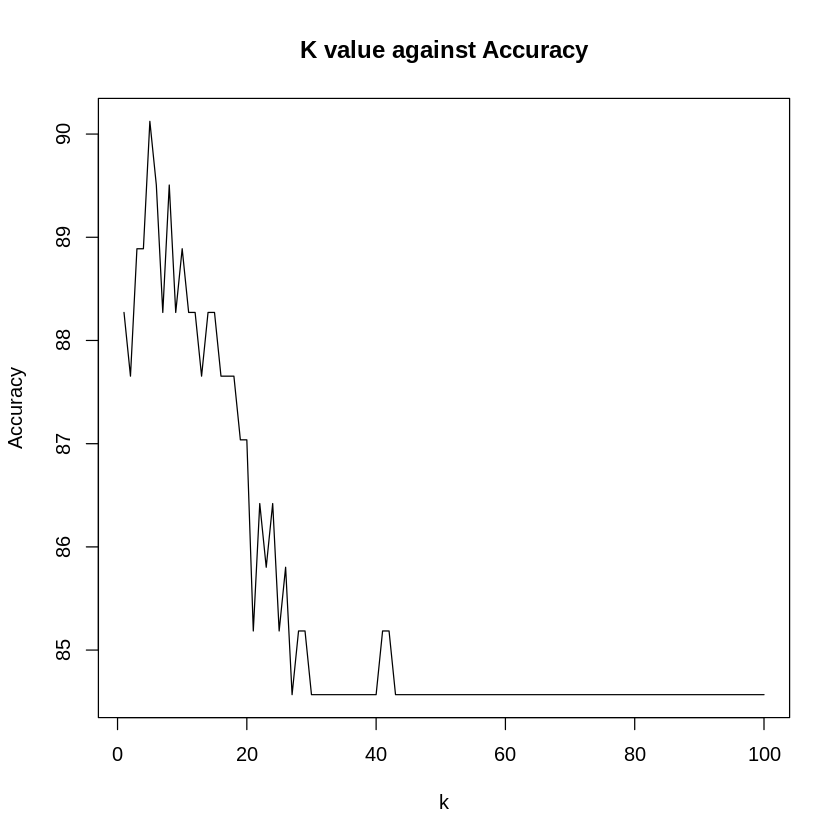

In [ ]:
#Find k such that accuracy of confusion matrix is the highest
i=1
k_accuracy=array(1:100)
k=array(1:100)
for (i in 1:100){
  set.seed(300) # Add set.seed() here for reproducibility
  knn_model <- knn(train=train_data, test=test_data, cl=train_data_group, k=i)
  k_accuracy[i] <- 100 * sum(test_data$group == knn_model)/NROW(test_data$group)
  k[i]=i
}
plot(k,k_accuracy,type="l",xlab="k",ylab="Accuracy",main="K value against Accuracy")

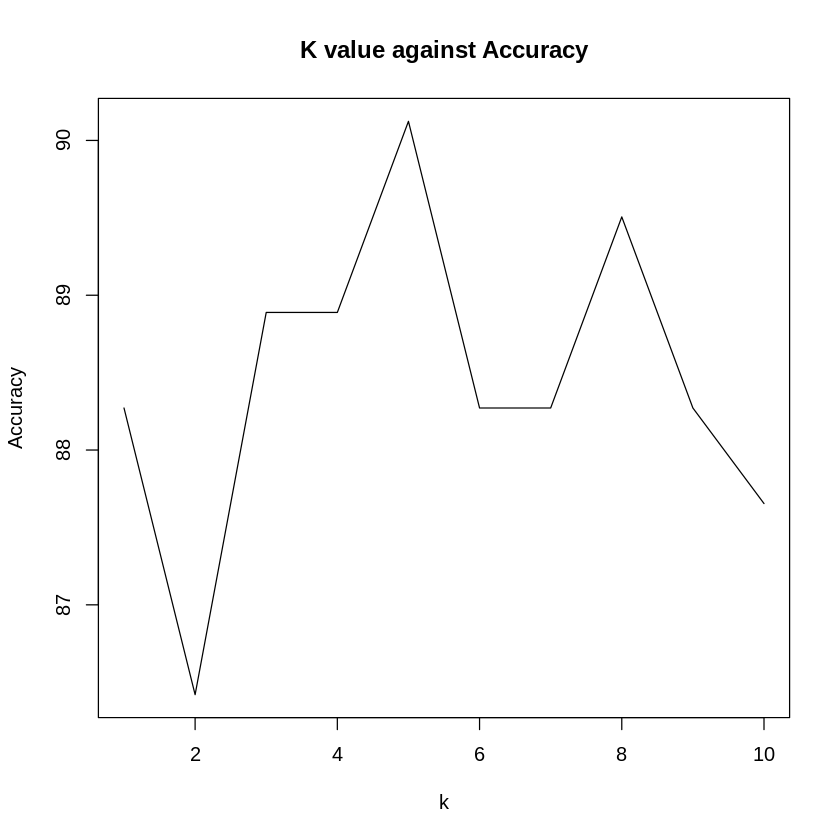

In [ ]:
#Find k such that accuracy of confusion matrix is the highest
i=1
k_accuracy=array(1:10)
k=array(1:10)
for (i in 1:10){
  knn_model <- knn(train=train_data, test=test_data, cl=train_data_group, k=i)
  k_accuracy[i] <- 100 * sum(test_data$group == knn_model)/NROW(test_data$group)
  k[i]=i
}
plot(k,k_accuracy,type="l",xlab="k",ylab="Accuracy",main="K value against Accuracy")

In [ ]:
#identify optimal k value
max(k_accuracy)

#indentify max accuracy
which.max(k_accuracy)

[1] 90.12346

[1] 5

In [ ]:
#identify optimal k value
print(paste("Accuracy for k=5:", k_accuracy[5]))
print(paste("Accuracy for k=7:", k_accuracy[7]))
print(paste("Accuracy for k=8:", k_accuracy[8]))

max_accuracy <- max(k_accuracy)
optimal_k_index <- which.max(k_accuracy)

print(paste("Maximum accuracy found:", max_accuracy))
print(paste("Optimal k value (index of max accuracy):", optimal_k_index))

[1] "Accuracy for k=5: 90.1234567901235"
[1] "Accuracy for k=7: 88.2716049382716"
[1] "Accuracy for k=8: 88.8888888888889"
[1] "Maximum accuracy found: 90.1234567901235"
[1] "Optimal k value (index of max accuracy): 5"


In [ ]:
set.seed(300)
#update the kNN model using best k value
knn_model <- knn(train=train_data, test=test_data, cl=train_data_group, k=5)
knn_model

#Generate new Confusion Matrix(cm)
cm <-table(knn_model, test_data$group)
cm
confusionMatrix(cm)

# detach(test_data) # Removed as test_data was never attached

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1
[149] 1 0 1 1 1 1 1 1 1 1 1 0 1 1
Levels: 0 1

         
knn_model   0   1
        0  11   2
        1  14 135

Confusion Matrix and Statistics

         
knn_model   0   1
        0  11   2
        1  14 135
                                          
               Accuracy : 0.9012          
                 95% CI : (0.8446, 0.9425)
    No Information Rate : 0.8457          
    P-Value [Acc > NIR] : 0.02725         
                                          
                  Kappa : 0.5292          
                                          
 Mcnemar's Test P-Value : 0.00596         
                                          
            Sensitivity : 0.44000         
            Specificity : 0.98540         
         Pos Pred Value : 0.84615         
         Neg Pred Value : 0.90604         
             Prevalence : 0.15432         
         Detection Rate : 0.06790         
   Detection Prevalence : 0.08025         
      Balanced Accuracy : 0.71270         
                                          
       'Positive' Class : 0               
                                          

## 3.3 Logistic Regression

### 3.3.1: Linear regression vs logistic regression

In [ ]:
#For Math
##Data preparation
#1. Read Data
d1 = df1

#2. Convert final grade to pass/fail
d1$group[d1$G3<10]<-0
d1$group[d1$G3>=10]<-1
str(d1)

#3. split into training data and testing data, and reshuffle data
set.seed(150)
sample=sample.split(d1$group, SplitRatio= .75)
train_data=subset(d1, sample==TRUE)
test_data=subset(d1, sample==FALSE)
##End of Data Preparation for Math

'data.frame':	395 obs. of  34 variables:
 $ school    : chr  "GP" "GP" "GP" "GP" ...
 $ sex       : chr  "F" "F" "F" "F" ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : chr  "U" "U" "U" "U" ...
 $ famsize   : chr  "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus   : chr  "A" "T" "T" "T" ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : chr  "at_home" "at_home" "at_home" "health" ...
 $ Fjob      : chr  "teacher" "other" "other" "services" ...
 $ reason    : chr  "course" "course" "other" "home" ...
 $ guardian  : chr  "mother" "father" "mother" "mother" ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : chr  "yes" "no" "yes" "no" ...
 $ famsup    : chr  "no" "yes" "no" "yes" ...
 $ paid      : chr  "no" "no" "yes" "yes" ...
 $ activities: chr  "no" "no" "no" "yes" ...
 $ nursery   : chr  "yes" "no" "yes" "yes" ...
 $


Call:
glm(formula = group ~ G1, family = binomial, data = train_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -7.9596     0.9821  -8.105 5.28e-16 ***
G1            0.8785     0.1032   8.509  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 376.69  on 296  degrees of freedom
Residual deviance: 195.38  on 295  degrees of freedom
AIC: 199.38

Number of Fisher Scoring iterations: 6


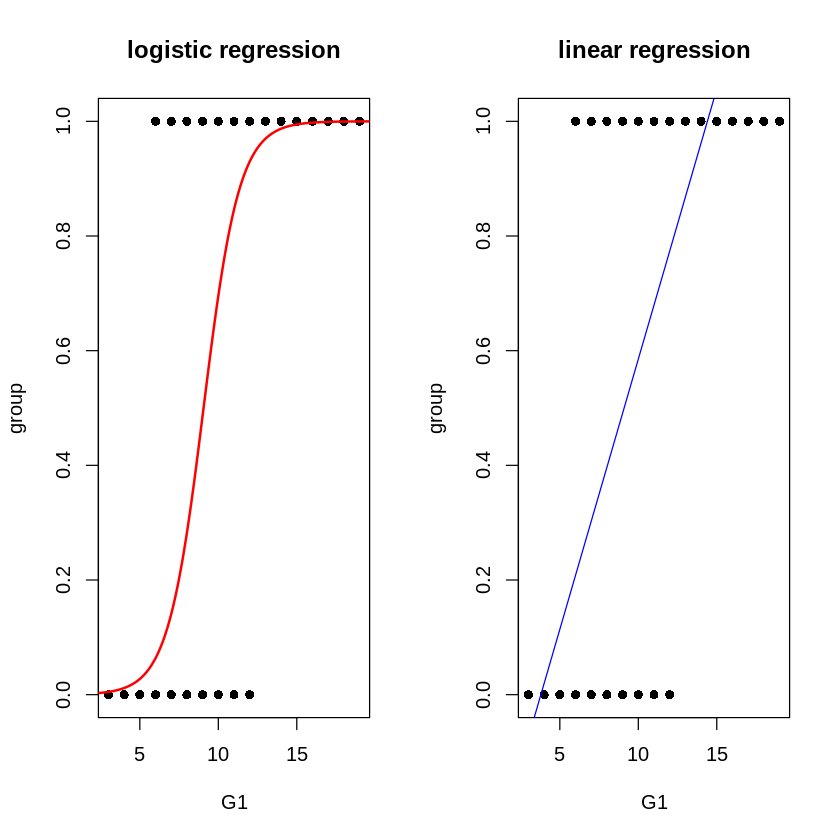

In [ ]:
###### simple logistic regression for explaination purposes

###For Math
logistic <- glm(group ~ G1, data=train_data, family=binomial)
summary(logistic)

#predict 1st grade
x <- seq (0, 20, 0.01)
y <- predict(logistic, list(G1=x),type="response")

par(mfrow=c(1:2))

#plot 1st grade against group(pass/fail)
plot(d1$G1, d1$group, pch = 16, xlab = "G1", ylab = "group", main="logistic regression")
lines(x, y, col = "red", lwd = 2)

plot(d1$G1, d1$group, pch = 16, xlab = "G1", ylab = "group", main="linear regression")
abline(lm(group ~ G1,data=d1), col="blue")

### 3.3.2: Multiple logistic regression

#### 3.3.2.1 For Math

In [ ]:
##### multiple logistic regression for predictive modelling
###For Math
logistic <- glm(group ~.-G3-G2-G1, data=d1, family=binomial)
summary(logistic)


Call:
glm(formula = group ~ . - G3 - G2 - G1, family = binomial, data = d1)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       4.90464    2.68263   1.828 0.067505 .  
schoolMS          0.24985    0.46348   0.539 0.589841    
sexM              0.47319    0.31331   1.510 0.130967    
age              -0.26491    0.13449  -1.970 0.048880 *  
addressU          0.19695    0.34019   0.579 0.562623    
famsizeLE3        0.18573    0.29795   0.623 0.533039    
PstatusT         -0.43621    0.44541  -0.979 0.327404    
Medu              0.09321    0.19693   0.473 0.636003    
Fedu              0.08193    0.16847   0.486 0.626734    
Mjobhealth        0.36782    0.69504   0.529 0.596662    
Mjobother        -0.43924    0.41006  -1.071 0.284096    
Mjobservices      0.29079    0.46467   0.626 0.531446    
Mjobteacher      -0.92403    0.60371  -1.531 0.125875    
Fjobhealth       -0.17389    0.82047  -0.212 0.832159    
Fjobother         0.19057    0.57762  

In [ ]:
#predict the probability based on the logistic model given
res2 <- predict(logistic,test_data,type="response")
res2

6         11         14         23         30         32         33 
0.96347108 0.73224430 0.83899341 0.93785795 0.60707526 0.95406911 0.63857879 
        35         37         42         44         46         48         49 
0.84145465 0.79062193 0.88591919 0.88936793 0.63535976 0.96970863 0.69586139 
        54         59         63         69         71         72         76 
0.46621251 0.64745639 0.64689214 0.72832362 0.91861200 0.89607323 0.78952125 
        81         82         97         98        109        112        118 
0.64994609 0.93675946 0.70938433 0.17369203 0.79554531 0.57478498 0.87659276 
       121        125        127        128        130        132        140 
0.85356371 0.67356842 0.88426642 0.03669017 0.74641633 0.67508712 0.81300172 
       143        144        147        151        153        157        160 
0.63919492 0.70954045 0.32870418 0.02416219 0.75279775 0.70623082 0.29370859 
       162        165        168        169        171        172        178 
0.15002059 0.02708411 0.86097224 0.49276549 0.28727789 0.79426915 0.89765147 
       180        182        184        189        190        192        198 
0.61164537 0.92401001 0.62593316 0.90710595 0.84953289 0.65815412 0.68650321 
       199        201        205        210        216        219        221 
0.59168733 0.83454779 0.69009155 0.65890852 0.88453384 0.76723849 0.27885237 
       229        231        232        241        243        247        256 
0.69256592 0.85737715 0.82743942 0.75604526 0.65154672 0.85240091 0.42035453 
       263        271        273        275        278        282        283 
0.82996258 0.04518729 0.63219996 0.72591542 0.55602116 0.53728879 0.79182672 
       287        292        297        299        301        313        332 
0.79535716 0.91878295 0.74768412 0.79618162 0.64676572 0.65795995 0.57012307 
       338        340        351        352        354        358        360 
0.81218527 0.80580996 0.13806956 0.89499905 0.25160483 0.81702313 0.85192949 
       363        364        370        378        386        388        393 
0.87410317 0.55507948 0.80875273 0.77031151 0.89043826 0.80800982 0.11217832

            Predicted_value
Actual_value FALSE TRUE
           0    13   19
           1     3   63

In [ ]:
#predict the group based on cut-off = 0.5
cm2 <-table(Actual_value=test_data$group, Predicted_value = res2>0.5)
cm2
#Build confusion matrix
cmm2 = cbind(c(cm2[1,1],cm2[2,1]),c(cm2[1,2],cm2[2,2]))
colnames(cmm2)<-c("failed","passed")
rownames(cmm2)<-c("failed","passed")
cmm2

            Predicted_value
Actual_value FALSE TRUE
           0    13   19
           1     3   63

,failed,passed
failed,13,19
passed,3,63


In [ ]:
#Compute Accuracy of this model
(13+63)/(13+19+3+63)

[1] 0.7755102

### 3.2.2.2 For Portuguese

In [ ]:
###For Portuguese
##Data Preparation

#1. Read data
d2=df2

#2. Convert final grade to pass/fail
d2$group[d2$G3<10]<-0
d2$group[d2$G3>=10]<-1
str(d2)

#3. Split data into training and testing set, reshuffle data
set.seed(150)
sample=sample.split(d2$group, SplitRatio= .75)
train_data=subset(d2, sample==TRUE)
test_data=subset(d2, sample==FALSE)

##End of Data Preparation

'data.frame':	649 obs. of  34 variables:
 $ school    : chr  "GP" "GP" "GP" "GP" ...
 $ sex       : chr  "F" "F" "F" "F" ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : chr  "U" "U" "U" "U" ...
 $ famsize   : chr  "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus   : chr  "A" "T" "T" "T" ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : chr  "at_home" "at_home" "at_home" "health" ...
 $ Fjob      : chr  "teacher" "other" "other" "services" ...
 $ reason    : chr  "course" "course" "other" "home" ...
 $ guardian  : chr  "mother" "father" "mother" "mother" ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ schoolsup : chr  "yes" "no" "yes" "no" ...
 $ famsup    : chr  "no" "yes" "no" "yes" ...
 $ paid      : chr  "no" "no" "no" "no" ...
 $ activities: chr  "no" "no" "no" "yes" ...
 $ nursery   : chr  "yes" "no" "yes" "yes" ...
 $ h

In [ ]:
#Build logistic model
logistic <- glm(group ~.-G3-G2-G1, data=d2, family=binomial)
summary(logistic)


Call:
glm(formula = group ~ . - G3 - G2 - G1, family = binomial, data = d2)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.59198    2.53384  -0.234 0.815273    
schoolMS         -2.00545    0.34865  -5.752 8.81e-09 ***
sexM             -0.40170    0.33435  -1.201 0.229578    
age               0.22207    0.13684   1.623 0.104616    
addressU          0.20457    0.31342   0.653 0.513945    
famsizeLE3        0.36658    0.33199   1.104 0.269521    
PstatusT          0.22030    0.43796   0.503 0.614954    
Medu             -0.02666    0.18291  -0.146 0.884112    
Fedu              0.22985    0.18379   1.251 0.211074    
Mjobhealth       -0.20383    0.67968  -0.300 0.764256    
Mjobother        -0.07702    0.34996  -0.220 0.825819    
Mjobservices      0.16293    0.46251   0.352 0.724636    
Mjobteacher       0.58988    0.74583   0.791 0.429000    
Fjobhealth       -1.77394    0.99081  -1.790 0.073392 .  
Fjobother        -0.63136    0.57605  

In [ ]:
#Predict the probability based on the logistic model given
res2 <- predict(logistic,test_data,type="response")
res2

4         10         12         13         16         29         32 
0.95855067 0.97946252 0.99680294 0.97524828 0.96120440 0.95634900 0.98015834 
        33         36         44         46         50         52         54 
0.98218596 0.98789647 0.94235796 0.89326138 0.98081073 0.97022474 0.90213619 
        55         59         62         63         64         69         72 
0.95777832 0.99155778 0.97395350 0.98689355 0.94639571 0.94436972 0.95101834 
        74         75         78         83         90         96         98 
0.96683839 0.92489206 0.97543839 0.97656255 0.93985145 0.94260717 0.95232358 
       101        102        114        118        120        122        130 
0.75163861 0.97932323 0.92296647 0.97532190 0.97594119 0.97274589 0.97280386 
       132        135        140        146        157        162        163 
0.20249295 0.97577003 0.98799063 0.98855436 0.95506425 0.45830972 0.93611407 
       166        167        170        171        179        180        182 
0.97226984 0.90636621 0.26730236 0.70981223 0.84863294 0.19837211 0.97329317 
       184        186        187        191        203        204        207 
0.93738369 0.97066140 0.99400782 0.98922411 0.95312150 0.93323372 0.92982497 
       211        212        222        223        230        233        238 
0.93530613 0.98119411 0.98211423 0.96455685 0.98496697 0.98961850 0.20307214 
       241        246        247        252        253        254        263 
0.98337229 0.98894341 0.95310808 0.91811308 0.95926238 0.92265451 0.95306146 
       266        269        273        275        278        279        288 
0.97786145 0.98513539 0.98835763 0.91710028 0.96626370 0.98760160 0.92157112 
       294        295        297        300        307        315        316 
0.99409151 0.95743266 0.97593285 0.86895877 0.98508583 0.98827864 0.95560914 
       322        326        334        340        342        345        346 
0.98731052 0.77731020 0.96846011 0.99417927 0.99643582 0.97215264 0.97378277 
       348        351        356        361        363        371        374 
0.99249522 0.93171656 0.99309514 0.98879956 0.98889806 0.96299271 0.98167557 
       388        392        400        403        405        408        409 
0.96870094 0.96351912 0.93977219 0.98337551 0.97588048 0.97976820 0.90099712 
       414        420        425        428        431        437        444 
0.44503825 0.91946595 0.85218763 0.73377534 0.58128009 0.26481127 0.74900519 
       447        450        452        453        454        458        462 
0.97652590 0.70035767 0.86972387 0.78689332 0.47513620 0.64603185 0.76783364 
       465        474        476        481        482        491        492 
0.71961386 0.59599507 0.85988858 0.38286182 0.57153258 0.41499406 0.62159630 
       496        499        500        501        510        515        519 
0.56511413 0.79121337 0.70032366 0.12408278 0.96039640 0.83183519 0.69910019 
       526        528        544        558        565        572        574 
0.85193889 0.91899354 0.22681017 0.20695706 0.74584265 0.07509862 0.82650337 
       578        581        582        591        596        598        600 
0.55585210 0.68926202 0.46696182 0.40568369 0.94215166 0.80229614 0.59901570 
       602        603        606        611        615        619        625 
0.87366940 0.91721358 0.41788551 0.15190507 0.92048873 0.85410728 0.60906393 
       626        627        629        638        643        644        646 
0.91140022 0.92945676 0.89365456 0.79469587 0.94195860 0.97511891 0.87473357 
       648 
0.60505390

In [ ]:
#Predict the group based on cut-off =0.5
cm2 <-table(Actual_value=test_data$group, Predicted_value = res2>0.5)
cm2

#Build confusion matrix
cmm2 = cbind(c(cm2[1,1],cm2[2,1]),c(cm2[1,2],cm2[2,2]))
colnames(cmm2)<-c("failed","passed")
rownames(cmm2)<-c("failed","passed")
cmm2

#Compute Accuracy for this model
(12+131)/(12+13+6+131)


#reset plot viewing to default
par(mfrow=c(1,1))

            Predicted_value
Actual_value FALSE TRUE
           0    12   13
           1     6  131

,failed,passed
failed,12,13
passed,6,131


[1] 0.882716

## 3.4 Decision Tree/ Tree Pruning

### 3.4.1: Decision Tree

In [ ]:
##Data Preparation
#1. Read Data
d1 = df1
d2 = df2
d3 = merge(d1,d2,by=c("school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"))

#2. Remove strongly correlated/insignificant variables
d3<-d3[,-which(colnames(d3)%in%c("G1.x","G2.x","G1.y","G2.y","address","school"))]

#3. Check for incomplete data
sum(colMeans(is.na(d3),rowMeans(is.na(d3))))

#4. Convert numeric final grade to categorical data
#0 = failed, 1=passed
score.x<-ifelse(d3$G3.x<10,0,1)
score.y<-ifelse(d3$G3.y<10,0,1)
d3<-d3[,-which(colnames(d3)%in%c("G3.x","G3.y"))]
d3<-data.frame(d3,score.x)
d3<-data.frame(d3,score.y)

#5. Create student_id
id<-c(1:382)
d3<-data.frame(d3,id)

#6. Split data into training and testing and reshuffle data
set.seed(123)
ndatatrain <-stratified(d3,c("score.x","score.y"),size=0.7)
ndatatest <- anti_join(d3, ndatatrain, by="id")

#7. For checking only
nrow(ndatatrain)
nrow(ndatatest)

##End of Data Preparation

[1] 0

[1] 267

[1] 115

#### 3.4.1.1: Math

Warning message in tree(as.factor(score.x) ~ . - id - failures.y - paid.y - absences.y - :
“NAs introduced by coercion”


node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 267 339.900 1 ( 0.33333 0.66667 )  
    2) failures.x < 0.5 219 246.900 1 ( 0.25114 0.74886 )  
      4) absences.x < 17.5 211 228.700 1 ( 0.23223 0.76777 )  
        8) goout.y < 3.5 146 139.800 1 ( 0.18493 0.81507 )  
         16) absences.x < 6.5 117 100.500 1 ( 0.15385 0.84615 )  
           32) freetime.x < 2.5 26   8.477 1 ( 0.03846 0.96154 )  
             64) freetime.x < 1.5 5   5.004 1 ( 0.20000 0.80000 ) *
             65) freetime.x > 1.5 21   0.000 1 ( 0.00000 1.00000 ) *
           33) freetime.x > 2.5 91  87.650 1 ( 0.18681 0.81319 )  
             66) freetime.x < 3.5 60  67.480 1 ( 0.25000 0.75000 )  
              132) absences.x < 0.5 24  32.600 1 ( 0.41667 0.58333 )  
                264) goout.x < 2.5 11  10.430 1 ( 0.18182 0.81818 ) *
                265) goout.x > 2.5 13  17.320 0 ( 0.61538 0.38462 )  
                  530) Medu < 3.5 8   6.028 0 ( 0.87500 0.12500 ) *
             

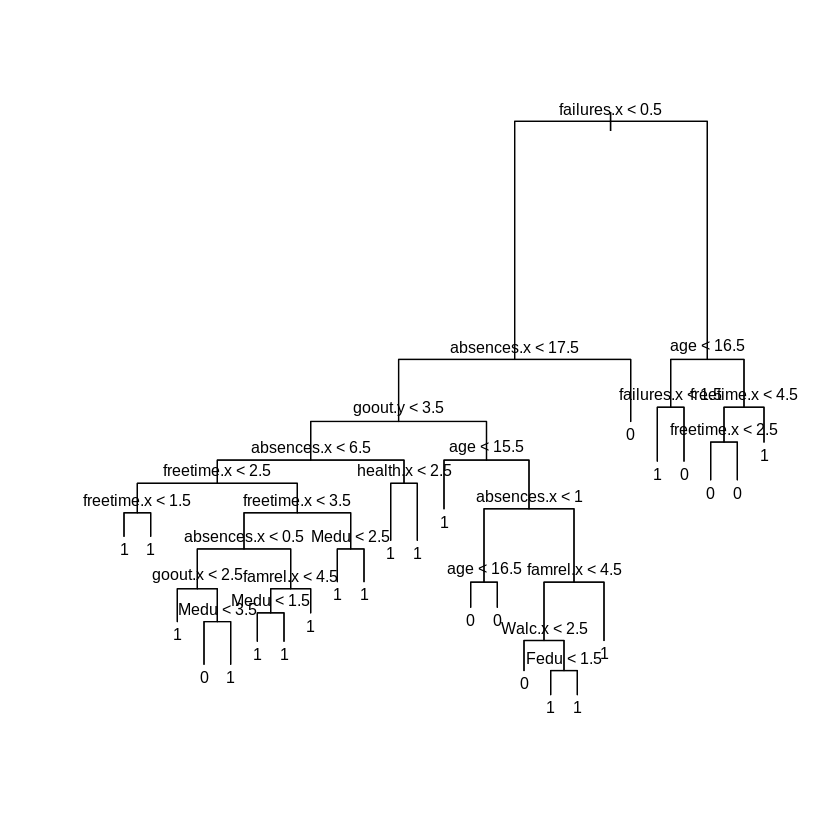

In [ ]:
###For Math: Build a tree model using "score.x" as response.
#Variables , exclude id_person and numeric variables involve y (Portuguese)
tree.d1 = tree(as.factor(score.x)~.-id-failures.y-paid.y-absences.y-score.y,ndatatrain)

#Plot decision tree
plot(tree.d1)
text(tree.d1,cex=0.8)
tree.d1

In [ ]:
#Build confusion matrix
tree.d1pred = predict(tree.d1,ndatatest,type = "class")
tree.d1pred
table(tree.d1pred,ndatatest$score.x)

#Calculate accuracy
(18+63)/(18+14+20+63)

Warning message in pred1.tree(object, tree.matrix(newdata)):
“NAs introduced by coercion”


[1] 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 [38] 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 [75] 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1
[112] 1 1 0 0
Levels: 0 1

           
tree.d1pred  0  1
          0 21 13
          1 17 64

[1] 0.7043478

#### 3.4.1.2: Portuguese

Warning message in tree(as.factor(score.y) ~ . - id, ndatatrain2):
“NAs introduced by coercion”


node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 267 152.000 1 ( 0.08240 0.91760 )  
    2) failures.y < 0.5 244 101.500 1 ( 0.05328 0.94672 )  
      4) absences.y < 15.5 230  69.460 1 ( 0.03478 0.96522 )  
        8) goout.y < 4.5 204  39.380 1 ( 0.01961 0.98039 )  
         16) Medu < 3.5 130  35.730 1 ( 0.03077 0.96923 )  
           32) Dalc.y < 1.5 104  19.770 1 ( 0.01923 0.98077 )  
             64) health.y < 4.5 73   0.000 1 ( 0.00000 1.00000 ) *
             65) health.y > 4.5 31  14.830 1 ( 0.06452 0.93548 )  
              130) Medu < 2.5 14  11.480 1 ( 0.14286 0.85714 )  
                260) goout.y < 2.5 8   8.997 1 ( 0.25000 0.75000 ) *
                261) goout.y > 2.5 6   0.000 1 ( 0.00000 1.00000 ) *
              131) Medu > 2.5 17   0.000 1 ( 0.00000 1.00000 ) *
           33) Dalc.y > 1.5 26  14.100 1 ( 0.07692 0.92308 )  
             66) health.y < 3.5 11  10.430 1 ( 0.18182 0.81818 )  
              132) goout.y < 2.5 5   0.000

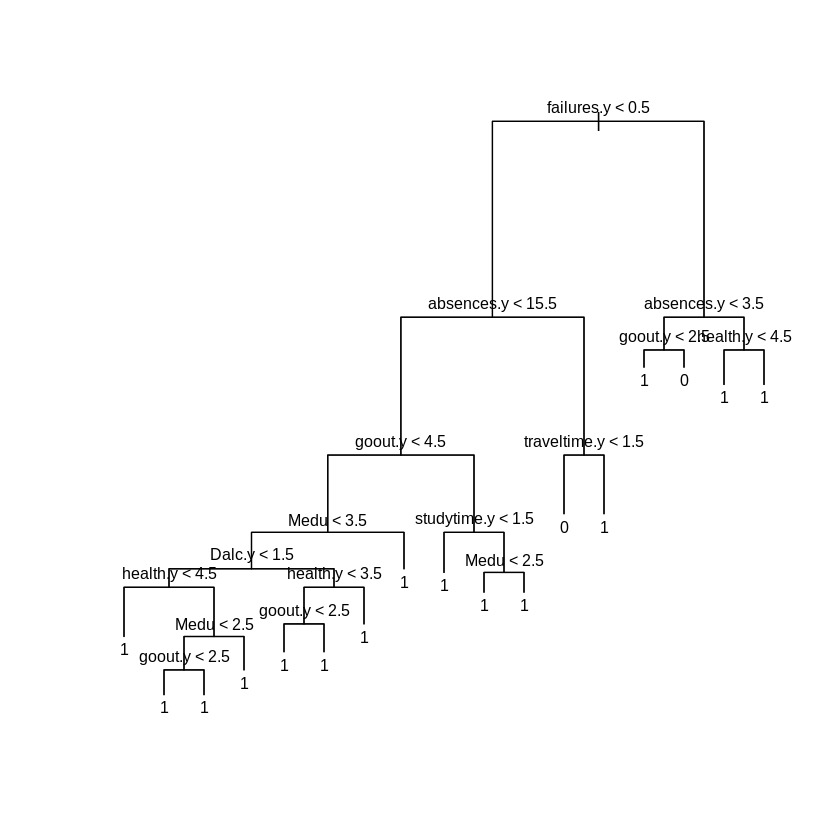

In [ ]:
###For Portuguese: Build a tree model using "score.y" as response.

#Variables , exclude id_person and numeric variables involving x (Maths)
#note: cannot directly remove from "tree()" function
ndatatrain2 =ndatatrain[,-c(12:28,46)] #col 12 to 28 involves x, col 46 is score x

#Plot decision tree
tree.d2 = tree(as.factor(score.y)~.-id,ndatatrain2)
plot(tree.d2)
text(tree.d2,cex=0.8)
tree.d2

In [ ]:
#Build confusion matrix
tree.d2pred = predict(tree.d2,ndatatest,type = "class")
table(tree.d2pred,ndatatest$score.y)

#Calculate accuracy
(2+100)/(2+5+8+100)

Warning message in pred1.tree(object, tree.matrix(newdata)):
“NAs introduced by coercion”


           
tree.d2pred   0   1
          0   1   5
          1   9 100

[1] 0.8869565

### 3.4.2 Tree Pruning


#### 3.4.2.1 Math

Warning message in pred1.tree(object, tree.matrix(newdata)):
“NAs introduced by coercion”


           
tree.d1pred  0  1
          0 21 12
          1 17 65

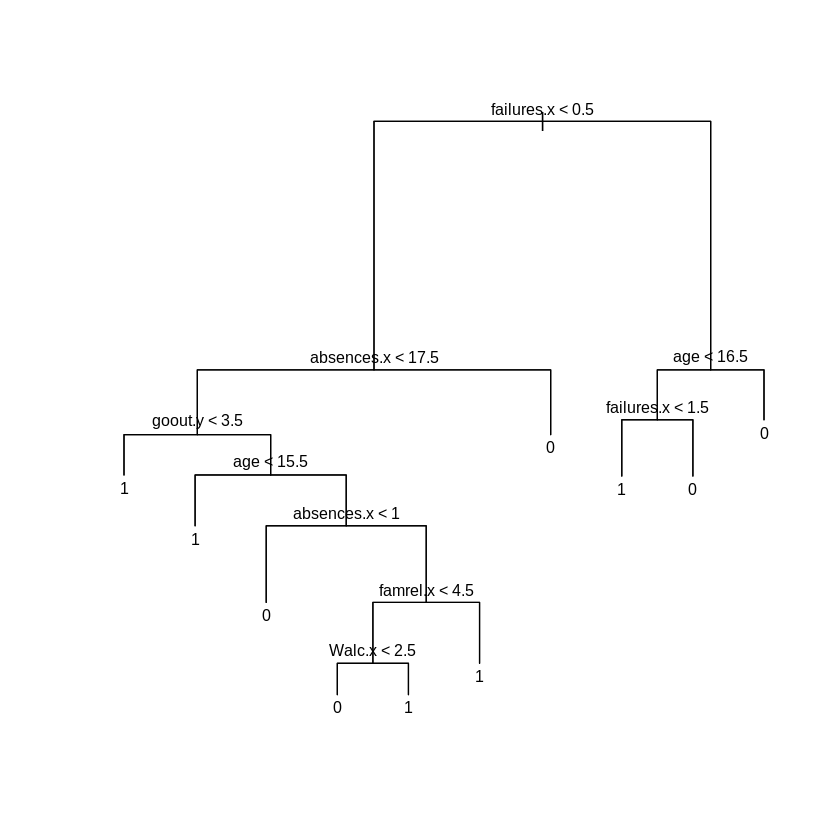

In [ ]:
#---------------------------------Section 8B---------------------------------

#Using the same data assigned in Section 8A,
#1A. Perform Tree Pruning for d1
set.seed(123)
prune.d1 = prune.misclass(tree.d1,best=9) #prune the decision tree with the misclassification rate (model, how large do you want your decision tree to be, best means no of terminal nodes)
plot(prune.d1)
text(prune.d1,cex=0.8)
tree.d1pred = predict(prune.d1,ndatatest,type="class")
table(tree.d1pred,ndatatest$score.x)

In [ ]:
#1B. Calculate accuracy
(17+66)/(17+11+21+66)

[1] 0.7217391

#### 3.4.2.2 Portuguese

Warning message in pred1.tree(object, tree.matrix(newdata)):
“NAs introduced by coercion”


           
tree.d2pred   0   1
          0   1   5
          1   9 100

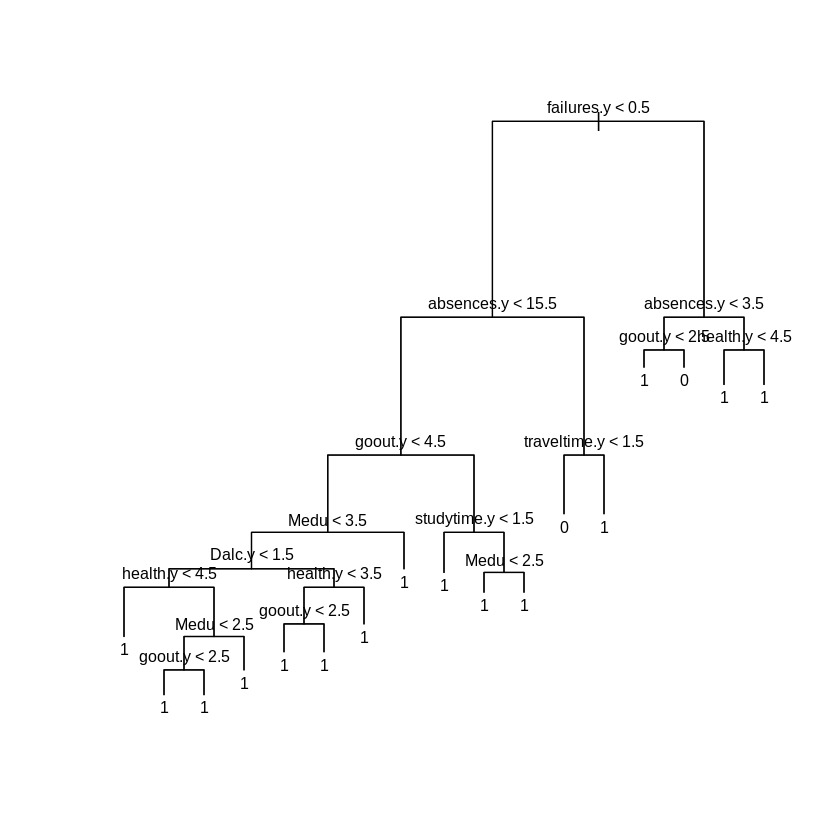

In [ ]:
#2A. Perform Tree Pruning for d2
set.seed(123)
prune.d2 = prune.misclass(tree.d2,best=9) #prune the decision tree with the misclassification rate (model, how large do you want your decision tree to be, best means no of terminal nodes)
plot(prune.d2)
text(prune.d2,cex=0.8)
tree.d2rpred = predict(prune.d2,ndatatest,type="class")
table(tree.d2pred,ndatatest$score.y)

In [ ]:
#2B. Calculate Accuracy
(2+100)/(2+5+8+100)

[1] 0.8869565

## 3.5 Bootstrap Aggregating (Bagging)

In [ ]:
#---------------------------------Section 9--------------------------------
##Data Preparation
#1. Read Data
d1 = df1
d2 = df2
d3=merge(d1,d2,by=c("school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"))

#2. Elimination of some dataset
d3<-d3[,-which(colnames(d3)%in%c("G1.x","G2.x","G1.y","G2.y","address","school"))]

#3. Check whether there are missing values
sum(colMeans(is.na(d3),rowMeans(is.na(d3))))

#4. Conversion of G3 to binary('0'=fail, '1'=pass)
score.x<-ifelse(d3$G3.x<10,0,1)
score.y<-ifelse(d3$G3.y<10,0,1)
d3<-d3[,-which(colnames(d3)%in%c("G3.x","G3.y"))]

#5. add score & id
d3<-data.frame(d3,score.x)
d3<-data.frame(d3,score.y)
id<-c(1:382)
d3<-data.frame(d3,id)
str(d3)

#6. Conversion of score from int(regression) to factor(classification)
d3$score.x <- as.factor(d3$score.x)
d3$score.y <- as.factor(d3$score.y)

#7. Separate into training and testing data, and reshuffle data
set.seed(123)
ndatatrain <- stratified(d3,c("score.x","score.y"),size=0.75)
ndatatest <- anti_join(d3, ndatatrain, by="id")

#8. Check the number of rows: indicate whether ndatatrain/ndatatest assigned properly
nrow(ndatatrain)
nrow(ndatatest)

#9. Training set for Math- remove variable related to y
ndatatrain_math = ndatatrain[,-c(29:45,47)] #col 29 to 45, 47 are y-related variables
ndatatrain_por=ndatatrain[,-c(12:28,46)] #col 12 to 28, 46 are x-related variables

##End of Data Preparation

[1] 0

'data.frame':	382 obs. of  48 variables:
 $ sex         : chr  "F" "F" "F" "F" ...
 $ age         : int  15 15 15 15 15 15 15 15 15 15 ...
 $ famsize     : chr  "GT3" "GT3" "GT3" "GT3" ...
 $ Pstatus     : chr  "T" "T" "T" "T" ...
 $ Medu        : int  1 1 2 2 3 3 3 2 3 3 ...
 $ Fedu        : int  1 1 2 4 3 4 4 2 1 3 ...
 $ Mjob        : chr  "at_home" "other" "at_home" "services" ...
 $ Fjob        : chr  "other" "other" "other" "health" ...
 $ reason      : chr  "home" "reputation" "reputation" "course" ...
 $ nursery     : chr  "yes" "no" "yes" "yes" ...
 $ internet    : chr  "yes" "yes" "no" "yes" ...
 $ guardian.x  : chr  "mother" "mother" "mother" "mother" ...
 $ traveltime.x: int  2 1 1 1 2 1 2 2 2 1 ...
 $ studytime.x : int  4 2 1 3 3 3 3 2 4 4 ...
 $ failures.x  : int  1 2 0 0 2 0 2 0 0 0 ...
 $ schoolsup.x : chr  "yes" "yes" "yes" "yes" ...
 $ famsup.x    : chr  "yes" "yes" "yes" "yes" ...
 $ paid.x      : chr  "yes" "no" "yes" "yes" ...
 $ activities.x: chr  "yes" "no" "yes"

[1] 286

[1] 96

### 3.5.1 For Math Students



Call:
 randomForest(formula = score.x ~ . - id, data = ndatatrain_math,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 26.22%
Confusion matrix:
   0   1 class.error
0 40  55   0.5789474
1 20 171   0.1047120

           
prediction1  0  1
          0 13  7
          1 19 57

Confusion Matrix and Statistics

           
prediction1  0  1
          0 13  7
          1 19 57
                                          
               Accuracy : 0.7292          
                 95% CI : (0.6289, 0.8148)
    No Information Rate : 0.6667          
    P-Value [Acc > NIR] : 0.11571         
                                          
                  Kappa : 0.3276          
                                          
 Mcnemar's Test P-Value : 0.03098         
                                          
            Sensitivity : 0.4062          
            Specificity : 0.8906          
         Pos Pred Value : 0.6500          
         Neg Pred Value : 0.7500          
             Prevalence : 0.3333          
         Detection Rate : 0.1354          
   Detection Prevalence : 0.2083          
      Balanced Accuracy : 0.6484          
                                          
       'Positive' Class : 0               
                                         

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
sex,2.3291296,0.006215941,1.30595603,2.5944173
age,4.5712303,4.171805259,5.82042698,7.6135892
famsize,-1.3608776,0.794103259,-0.27868188,2.2880399
Pstatus,-0.1598327,-2.317942208,-1.90630608,0.8482197
Medu,2.0613427,1.853470576,2.73071246,4.5174962
Fedu,0.7249352,2.782108457,2.79633051,4.7630908
Mjob,5.1231248,1.685699027,4.13852819,6.9063235
Fjob,0.8915237,0.637819613,0.95454226,4.9606487
reason,-0.1585953,0.562177195,0.33461859,4.7692174
nursery,1.5878607,0.140948137,0.97229147,2.1438740


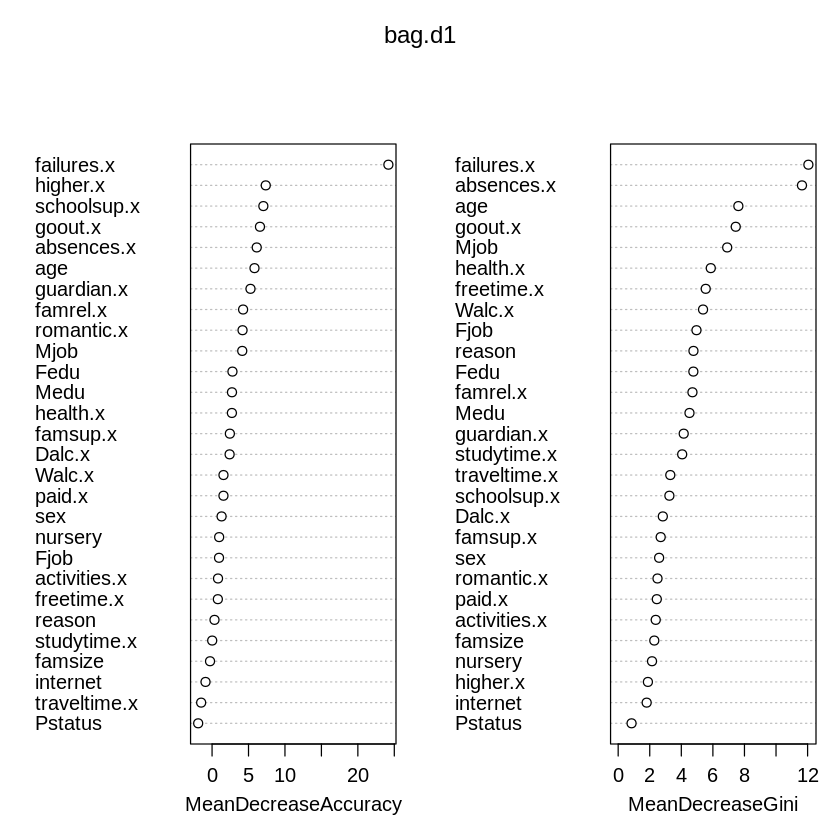

In [ ]:
# Bagging for d1
set.seed(123)
bag.d1 = randomForest(score.x~.-id,data=ndatatrain_math,importance=TRUE)
bag.d1

#Confusion matrix of the models for Maths
prediction1 = predict(bag.d1, ndatatest, type="class")
cm1 = table(prediction1, ndatatest$score.x)
cm1
confusionMatrix(cm1)

#Plot of importance of factors of Math result
importance(bag.d1)
varImpPlot(bag.d1)

### 3.5.2 For Portuguese Students



Call:
 randomForest(formula = score.y ~ . - id, data = ndatatrain_por,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 6.64%
Confusion matrix:
  0   1 class.error
0 5  19   0.7916667
1 0 262   0.0000000

           
prediction2  0  1
          0  1  0
          1  7 88

Confusion Matrix and Statistics

           
prediction2  0  1
          0  1  0
          1  7 88
                                          
               Accuracy : 0.9271          
                 95% CI : (0.8555, 0.9702)
    No Information Rate : 0.9167          
    P-Value [Acc > NIR] : 0.44685         
                                          
                  Kappa : 0.2075          
                                          
 Mcnemar's Test P-Value : 0.02334         
                                          
            Sensitivity : 0.12500         
            Specificity : 1.00000         
         Pos Pred Value : 1.00000         
         Neg Pred Value : 0.92632         
             Prevalence : 0.08333         
         Detection Rate : 0.01042         
   Detection Prevalence : 0.01042         
      Balanced Accuracy : 0.56250         
                                          
       'Positive' Class : 0               
                                         

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
sex,5.4652139,4.4165989,6.14864155,1.1053207
age,5.0054477,0.7387758,2.75871209,1.9647491
famsize,0.8633366,-2.1656238,-1.81949789,0.6476253
Pstatus,-1.7211253,-1.2839800,-1.61019423,0.1266875
Medu,1.8156600,1.0511015,1.77831258,1.6352690
Fedu,8.9431235,3.4414277,6.74213129,2.1661233
Mjob,4.1704312,-0.9787327,1.08446336,1.2270978
Fjob,3.6637795,-0.5013396,1.32351613,1.3497439
reason,2.7064163,2.4239831,3.28645064,1.9417101
nursery,0.1246729,2.6782662,2.38118885,0.7884652


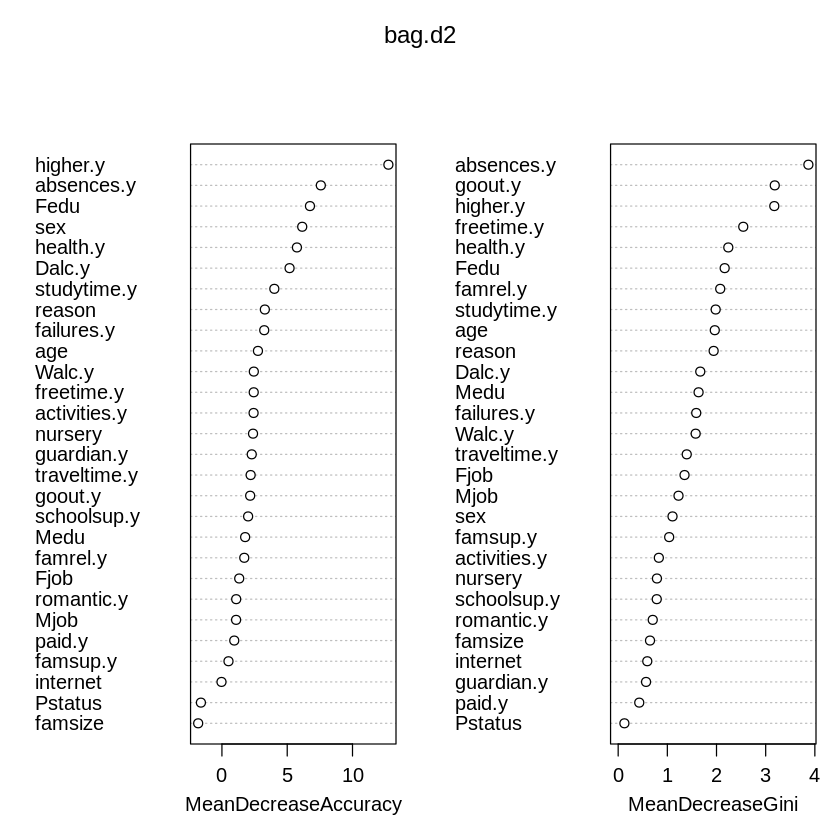

In [ ]:
# Bagging for d2
bag.d2 = randomForest(score.y~.-id,data=ndatatrain_por,importance=TRUE)
bag.d2

#Confusion matrix of the models for Portuguese
prediction2 = predict(bag.d2, ndatatest, type="class")
cm2 = table(prediction2, ndatatest$score.y)
cm2
confusionMatrix(cm2)

#Plot of importance of factors of Portuguese result
importance(bag.d2)
varImpPlot(bag.d2)

#------------------------------------End-----------------------------------